# Analysis of Manual Annotations - Topical Changes over Time

This notebook investigates how the topical focus of individual periodicals, and of all periodicals written in a specific language as a whole, changed over time. Plots will be saved in dedicated folders. The analysis relies on manual annotation and not on topic modeling results. In the last cells, periodicals are clustered according to their topical focus using the information bottleneck method.

This notebook (mainly provided by Bernhard Geiger, Know-Center) is supposed to work with the pickled data from December 23rd, 2020.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
plt.style.use("seaborn-whitegrid")
plt.rc('ps',fonttype = 42)
plt.rc('pdf',fonttype = 42)
plt.rcParams.update({'font.size': 20})
plt.rcParams['ps.useafm'] = True
#plt.rcParams['pdf.use14corefonts'] = True
plt.rcParams['axes.unicode_minus'] = False

In [2]:
texts_df = pd.read_pickle("../data/processed/texts_new_20201223.p")
texts_df=texts_df.reset_index()
texts_df.head()

index  position level             form  \
0      0         0     1                    
1      1         1     1      Zitat/Motto   
2      2         2     1  Metatextualität   
3      3         3     2                    
4      4         4     2      Zitat/Motto   

                                                text  persons places  \
0                                     XLIV. Discours       {}     {}   
1  Inde hominum pecudúmque genus, vitæque volantu...       {}     {}   
2  Observations sur la Structure de l’Univers, & ...       {}     {}   
3  Quoi qu’il y ait un plaisir extraordinaire à c...  {Locke}     {}   
4  Il me semble, dit Mr. Locke, qu’on peut conclu...  {Locke}     {}   

                                               works      filename  \
0                                                 {}  mws.2461.xml   
1                                                 {}  mws.2461.xml   
2                                                 {}  mws.2461.xml   
3  {Entretiens sur la pluralité des Mondes, Essai...  mws.2461.xml   
4                                                 {}  mws.2461.xml   

                      periodical_title volume_number issue_number  \
0  Le Spectateur ou le Socrate moderne             5          044   
1  Le Spectateur ou le Socrate moderne             5          044   
2  Le Spectateur ou le Socrate moderne             5          044   
3  Le Spectateur ou le Socrate moderne             5          044   
4  Le Spectateur ou le Socrate moderne             5          044   

      issue_title  author     country language  date         topics  
0  XLIV. Discours  Anonym  Frankreich   French  1723  {Idea of Man}  
1  XLIV. Discours  Anonym  Frankreich   French  1723  {Idea of Man}  
2  XLIV. Discours  Anonym  Frankreich   French  1723  {Idea of Man}  
3  XLIV. Discours  Anonym  Frankreich   French  1723  {Idea of Man}  
4  XLIV. Discours  Anonym  Frankreich   French  1723  {Idea of Man}

In [3]:
texts_reduced=texts_df[['filename','periodical_title','volume_number','issue_number','author','language','date','topics']]

In [4]:
texts_reduced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41675 entries, 0 to 41674
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   filename          41675 non-null  object
 1   periodical_title  41675 non-null  object
 2   volume_number     41675 non-null  object
 3   issue_number      41675 non-null  object
 4   author            41675 non-null  object
 5   language          41675 non-null  object
 6   date              41675 non-null  object
 7   topics            41675 non-null  object
dtypes: object(8)
memory usage: 2.5+ MB


In [5]:
texts_reduced=texts_reduced.drop_duplicates('filename')

In [6]:
texts_reduced.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3854 entries, 0 to 41670
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   filename          3854 non-null   object
 1   periodical_title  3854 non-null   object
 2   volume_number     3854 non-null   object
 3   issue_number      3854 non-null   object
 4   author            3854 non-null   object
 5   language          3854 non-null   object
 6   date              3854 non-null   object
 7   topics            3854 non-null   object
dtypes: object(8)
memory usage: 271.0+ KB


In [7]:
texts_reduced.head()

filename                     periodical_title volume_number  \
0       mws.2461.xml  Le Spectateur ou le Socrate moderne             5   
7       mws.7211.xml                         Les Chiffons             1   
77  mws-117-1015.xml               Lo Spettatore italiano             3   
91      mws.5479.xml    Lo Spettatore italiano-piemontese             1   
99      mws.7082.xml                Il Filosofo alla Moda             4   

   issue_number                         author language  date  \
0           044                         Anonym   French  1723   
7            01   Jacques Mague de Saint-Aubin   French  1786   
77           32  Giovanni Ferri di S. Costante  Italian  1822   
91           03               Francesco Grassi  Italian  1786   
99          249                Cesare Frasponi  Italian  1728   

                                topics  
0                        {Idea of Man}  
7       {Manners and Customs, Fashion}  
77               {Idea of Man, Morale}  
91                           {Economy}  
99  {Manners and Customs, Idea of Man}

In [8]:
topics_count = pd.Series()
for topics in texts_reduced["topics"]:
    for topic in topics:
        if topic not in topics_count:
            topics_count[topic] = 1
        else:
            topics_count[topic] += 1

<ipython-input-8-a24b70aa2172>:1: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  topics_count = pd.Series()


In [9]:
for topic in topics_count.index:
    texts_reduced[topic]=0

In [10]:
texts_reduced['topics'].iloc[0]

{'Idea of Man'}

In [11]:
for row in range(len(texts_reduced)):
    for topic in texts_reduced['topics'].iloc[row]:
        texts_reduced.loc[texts_reduced.index[row],topic]=1

In [12]:
# this is taken from a previous version that had still some issues with periodical names
# probably, these issues are resolved for the most recent data version. The code here stays to
# simplify the display of dates and to account for potential remaining wrong periodical names.

texts_corrected=texts_reduced.reset_index()
texts_corrected.loc[texts_corrected.date=='1715\n                        [1714]','date']=1715
texts_corrected.loc[texts_corrected.date=='1760-1761','date']=1760
texts_corrected.loc[texts_corrected.date=='1762-1763','date']=1762
texts_corrected.loc[texts_corrected.date=='1763-1763','date']=1763
texts_corrected.loc[texts_corrected.date=='1711-1712','date']=1711
texts_corrected.loc[texts_corrected.date=='1723-1725','date']=1723
texts_corrected.loc[texts_corrected.date=='1735-1736','date']=1735
texts_corrected.loc[texts_corrected.date=='1779-1780','date']=1779
texts_corrected.loc[texts_corrected.date=='1786-1788','date']=1786
texts_corrected.loc[texts_corrected.date=='1795-1796','date']=1795
texts_corrected.loc[texts_corrected.date=='1803-1804','date']=1803
texts_corrected.loc[texts_corrected.date=='1787\n                    bzw.1788','date']=1787
texts_corrected.loc[texts_corrected.date=='1750\n                        [1749-1751]','date']=1750
texts_corrected.loc[texts_corrected.date=='1724\n                        [1723-1724]','date']=1724
texts_corrected.loc[texts_corrected.date=='1750 [1749-1751]','date']=1750
texts_corrected.loc[texts_corrected.date=='1724 [1723-1724]','date']=1724
texts_corrected.loc[texts_corrected.date=='1787 bzw.1788','date']=1787
texts_corrected.loc[texts_corrected.date=='1715 [1714]','date']=1715
texts_corrected.loc[texts_corrected.date=='1751 [1749-1751]','date']=1751
texts_corrected.loc[texts_corrected.date=='1751\n                        [1749-1751]','date']=1751

texts_corrected = texts_corrected.drop(texts_corrected[texts_corrected.date=='missing'].index)
texts_corrected = texts_corrected.drop(texts_corrected[texts_corrected.date=='4-192'].index)

texts_corrected.loc[texts_corrected.periodical_title=='Le Spectateur français ou le Nouveau Socrate moderen','periodical_title']='Le Spectateur français ou le Nouveau Socrate moderne'
texts_corrected.loc[texts_corrected.periodical_title=='Le Spectateur françois ou le Nouveau Socrate moderne','periodical_title']='Le Spectateur français ou le Nouveau Socrate moderne'
texts_corrected.loc[texts_corrected.periodical_title=='Le Spectateur français ou le Nouveau Socrate moderne','periodical_title']='Le Spectateur français ou le Nouveau Socrate moderne'
texts_corrected.loc[texts_corrected.periodical_title=='Gazzetta urbana \t\t\t\t\t\tveneta','periodical_title']='Gazzetta urbana veneta'
texts_corrected.loc[texts_corrected.periodical_title=='Gazzetta urbana veneta','periodical_title']='Gazzetta urbana veneta'
texts_corrected.loc[texts_corrected.periodical_title=='Le Spectateur français ou Journal des Mœurs','periodical_title']='Le Spectateur français ou Journal des Mœurs'
texts_corrected.loc[texts_corrected.periodical_title=='Le Spectateur français, ou Journal des moeurs','periodical_title']='Le Spectateur français ou Journal des Mœurs'
texts_corrected = texts_corrected.drop(texts_corrected[texts_corrected.periodical_title=='missing'].index)

In [13]:
journal_count=texts_corrected.groupby('periodical_title')['issue_number'].count().sort_values(ascending=False)

In [14]:
from datetime import datetime
for row in range(len(texts_corrected)):
    try:
        texts_corrected.loc[texts_corrected.index[row],'date']=datetime.strptime(str(texts_corrected.loc[texts_corrected.index[row],'date']), '%Y').year
    except ValueError:
        try:
            texts_corrected.loc[texts_corrected.index[row],'date']=datetime.strptime(str(texts_corrected.loc[texts_corrected.index[row],'date']), '%Y-%m-%d').year
        except ValueError:
            print(row)
        

In [15]:
topics_count.sort_values()

Austria                       1
Apologetic of Spain           2
Switzerland                   4
Friendship                    5
America (West India)         11
Germany                      19
Foreign Societies            43
Italy                        48
Spain                        50
Superstition                 52
Critics on Nobility          78
England                      83
Nature                       86
Other Countries              87
Charity                      99
France                      101
Passion                     107
Economy                     116
Law                         130
Family                      133
Culture of Conversation     145
Science                     154
Happiness                   159
Politics                    161
Reason                      165
Fashion                     182
Structure of Society        187
Image of Men                215
Philosophy                  245
Education and Formation     276
Religion                    319
Morale  

In [16]:
#relevant_topics=['Manners and Customs','Autopoetical Reflection','Idea of Man','Politics','Love','Image of Women','Theatre Literature Arts','Morale','Religion']
#relevant_topics=['Theatre Literature Arts']
relevant_topics=['Manners and Customs','Autopoetical Reflection','Idea of Man','Image of Men','Nature','Science','Politics','Love','Image of Women','Theatre Literature Arts','Morale','Religion','Passion','Fashion']

texts_changes=texts_corrected[['date','language','periodical_title','issue_number','volume_number']+relevant_topics]

In [17]:
texts_changes.head()

date language                     periodical_title issue_number  \
0  1723   French  Le Spectateur ou le Socrate moderne          044   
1  1786   French                         Les Chiffons           01   
2  1822  Italian               Lo Spettatore italiano           32   
3  1786  Italian    Lo Spettatore italiano-piemontese           03   
4  1728  Italian                Il Filosofo alla Moda          249   

  volume_number  Manners and Customs  Autopoetical Reflection  Idea of Man  \
0             5                    0                        0            1   
1             1                    1                        0            0   
2             3                    0                        0            1   
3             1                    0                        0            0   
4             4                    1                        0            1   

   Image of Men  Nature  Science  Politics  Love  Image of Women  \
0             0       0        0         0     0               0   
1             0       0        0         0     0               0   
2             0       0        0         0     0               0   
3             0       0        0         0     0               0   
4             0       0        0         0     0               0   

   Theatre Literature Arts  Morale  Religion  Passion  Fashion  
0                        0       0         0        0        0  
1                        0       0         0        0        1  
2                        0       1         0        0        0  
3                        0       0         0        0        0  
4                        0       0         0        0        0

In [18]:
import os
if not os.path.isdir("results/plots/topics/"):
    os.makedirs("results/plots/topics/")

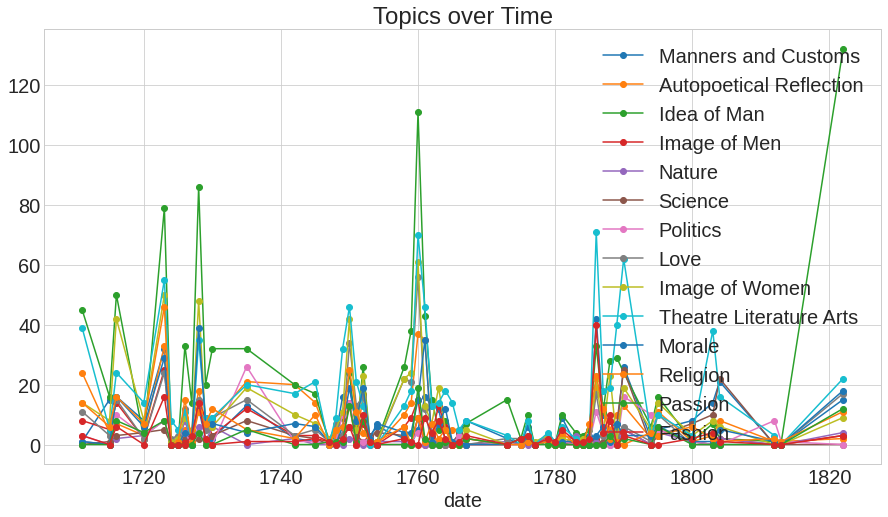

In [19]:
topics_year=texts_changes.groupby('date').sum()
plot = topics_year.plot(figsize=(15,8),marker='o',title='Topics over Time')
fig = plot.get_figure()
fig.savefig("results/plots/topics/topics_time.pdf",bbox_inches='tight')

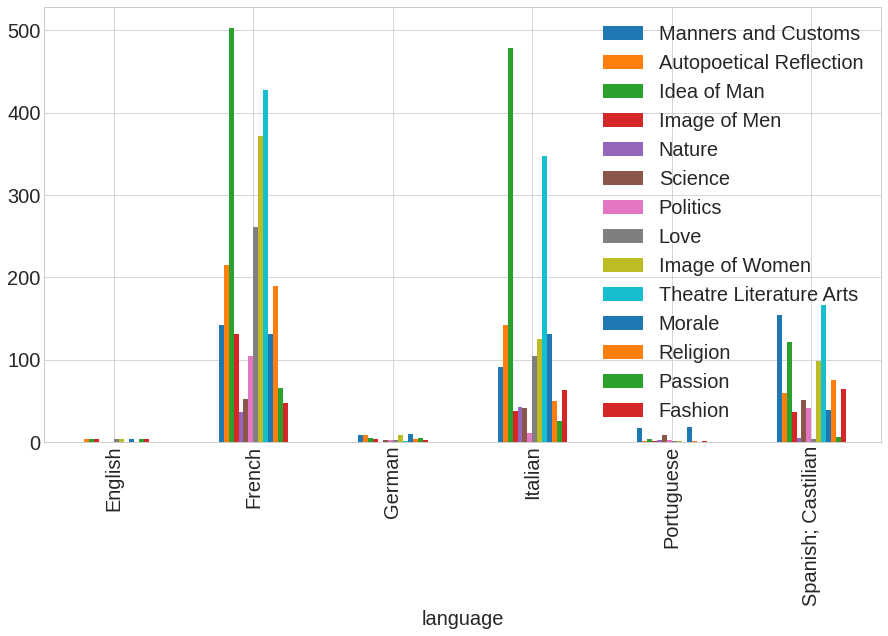

In [20]:
topics_language=texts_changes.groupby('language').sum()
ax = topics_language.plot(figsize=(15,8),kind='bar')
ax.set_xticks(range(len(topics_language.index)))
ax.set_xticklabels(topics_language.index, rotation=90);
fig = ax.get_figure()
fig.savefig("results/plots/topics/topics_language.pdf",bbox_inches='tight')

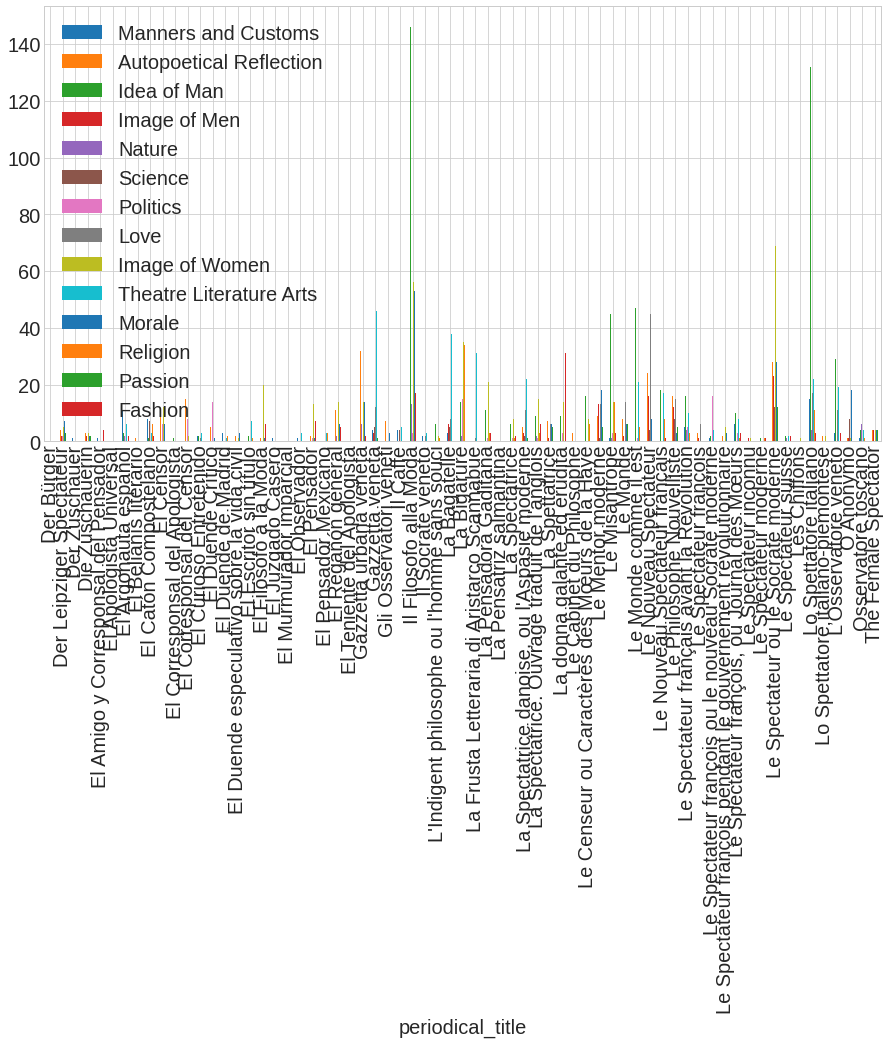

In [21]:
topics_language=texts_changes.groupby('periodical_title').sum()
ax = topics_language.plot(figsize=(15,8),kind='bar')
ax.set_xticks(range(len(topics_language.index)))
ax.set_xticklabels(topics_language.index, rotation=90);
fig = ax.get_figure()
fig.savefig("results/plots/topics/topics_journal.pdf",bbox_inches='tight')

In [22]:
core_languages=['French','Spanish; Castilian','Italian']

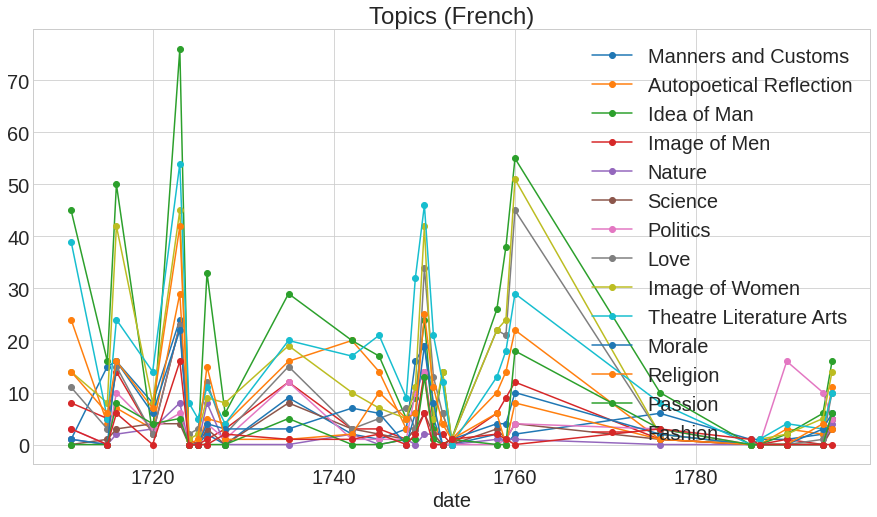

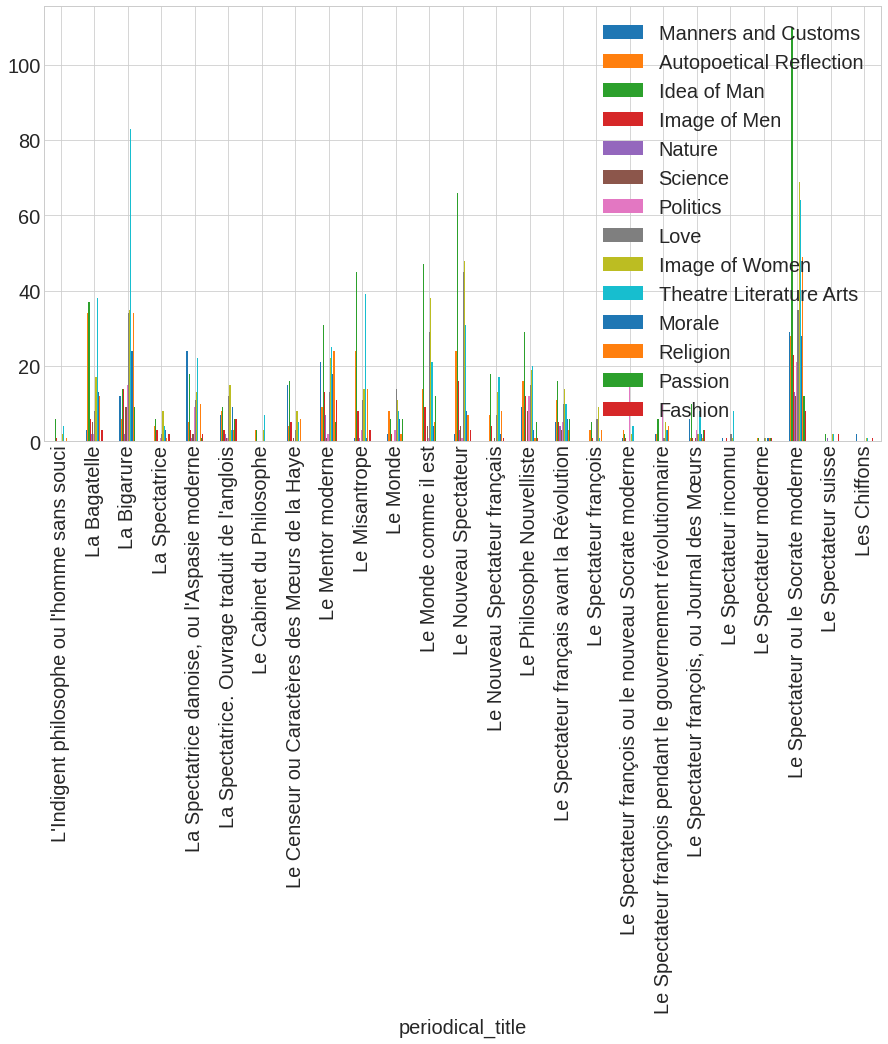

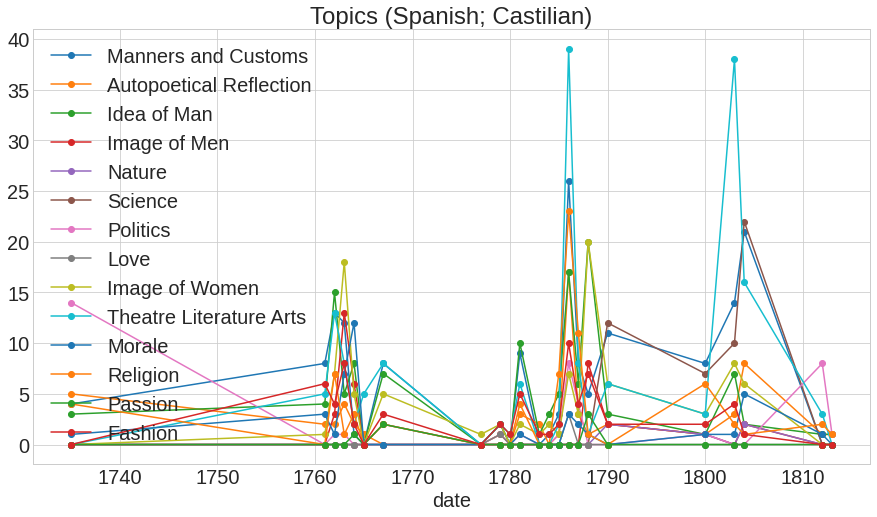

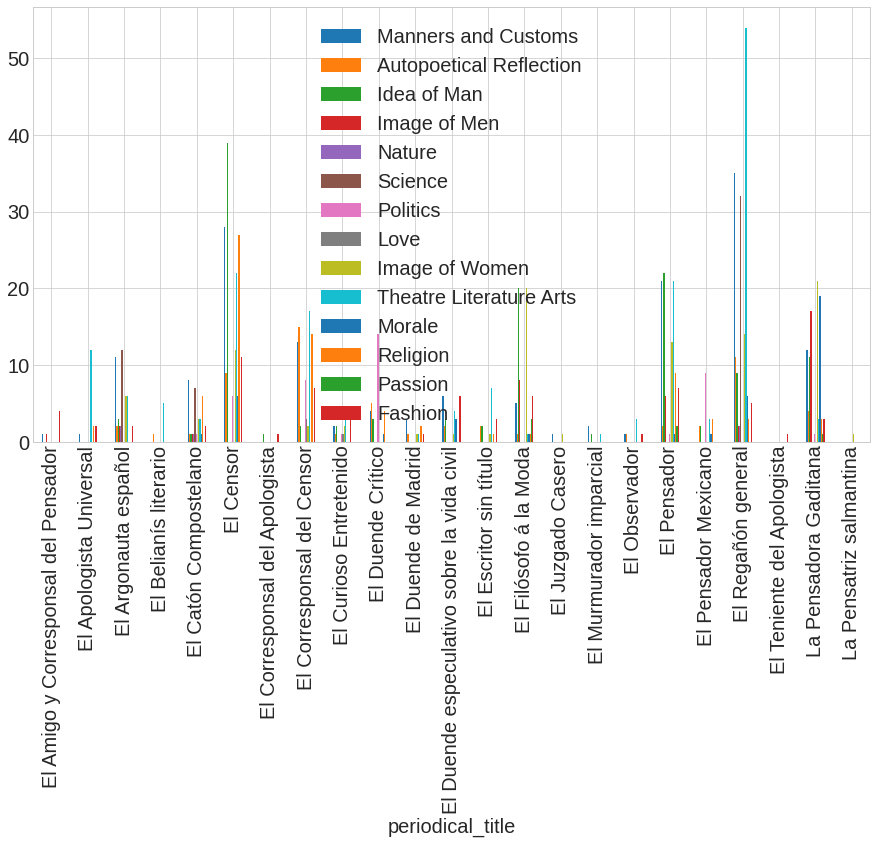

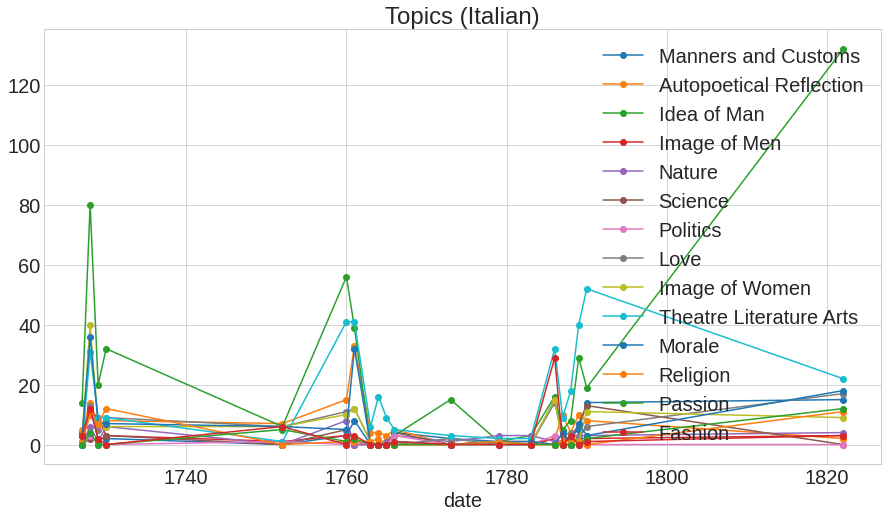

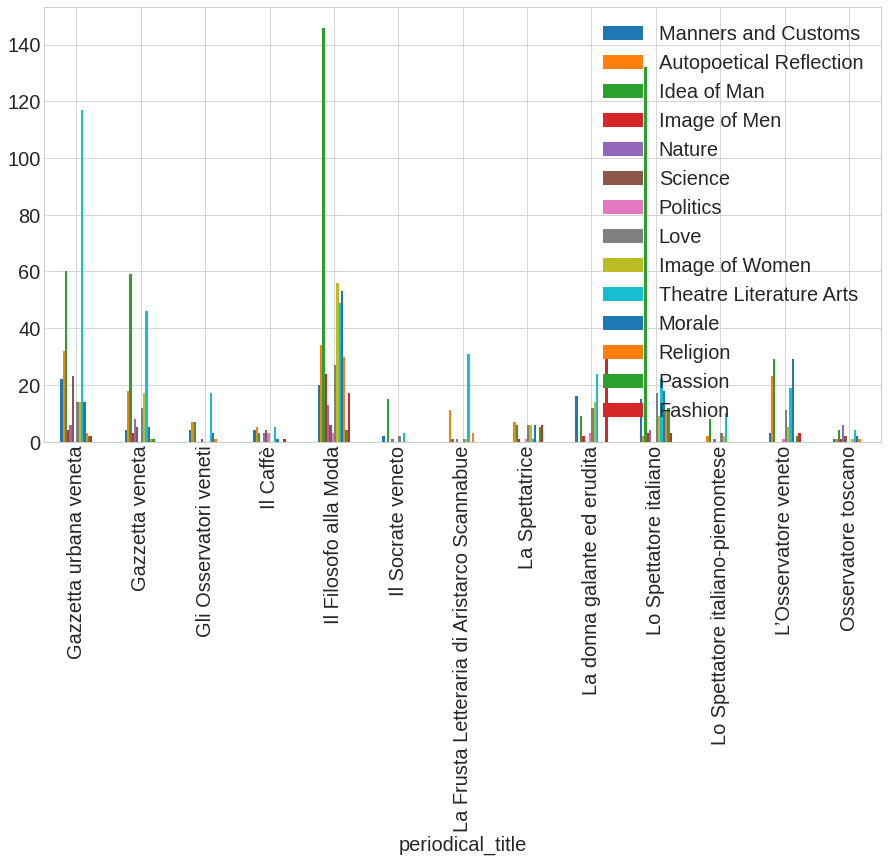

In [23]:
for language in core_languages:
    topics_year_language=texts_changes.loc[texts_corrected.language==language].groupby('date').sum()
    ax = topics_year_language.plot(figsize=(15,8),marker='o',title='Topics ('+language+')')
    fig = ax.get_figure()
    fig.savefig("results/plots/topics/topics_time_"+language+".pdf")

    topics_language=texts_changes.loc[texts_changes.language==language].groupby('periodical_title').sum()
    ax = topics_language.plot(figsize=(15,8),kind='bar')
    ax.set_xticks(range(len(topics_language.index)))
    ax.set_xticklabels(topics_language.index, rotation=90);
    fig = ax.get_figure()
    fig.savefig("results/plots/topics/topics_journal_"+language+".pdf",bbox_inches='tight')

/home/bgeiger/anaconda3/envs/py38/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:337: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


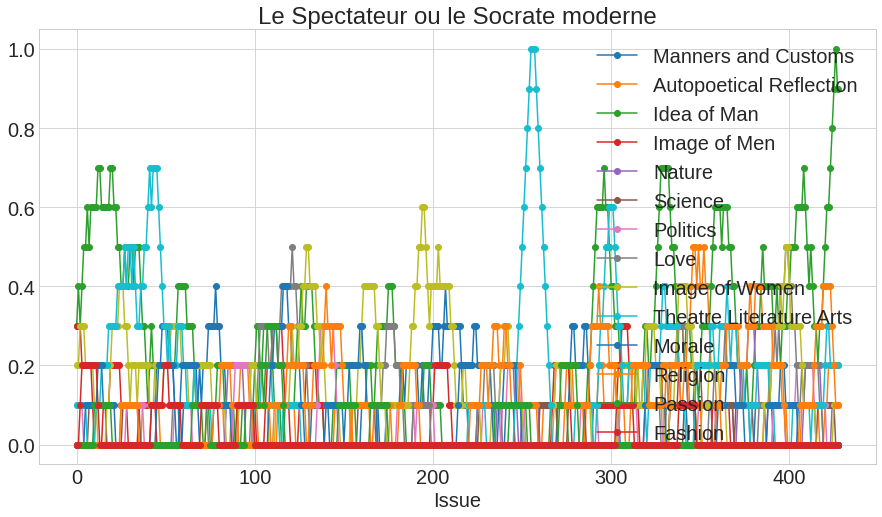

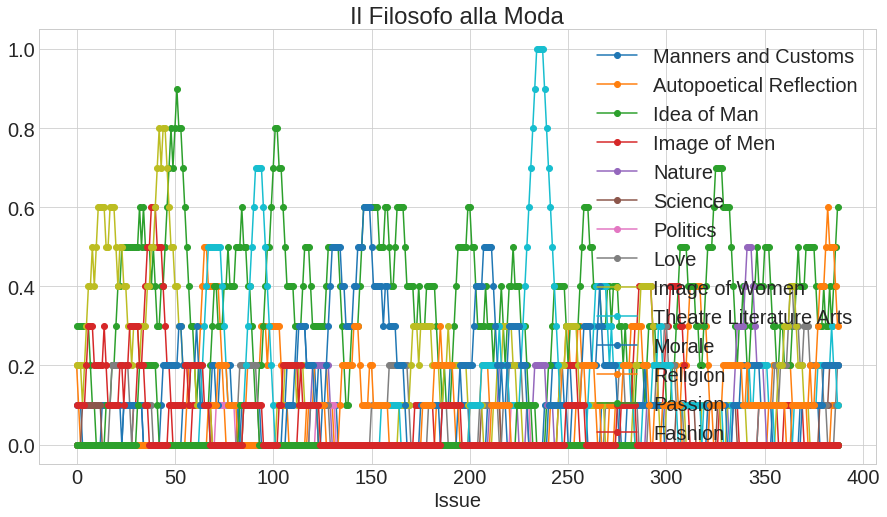

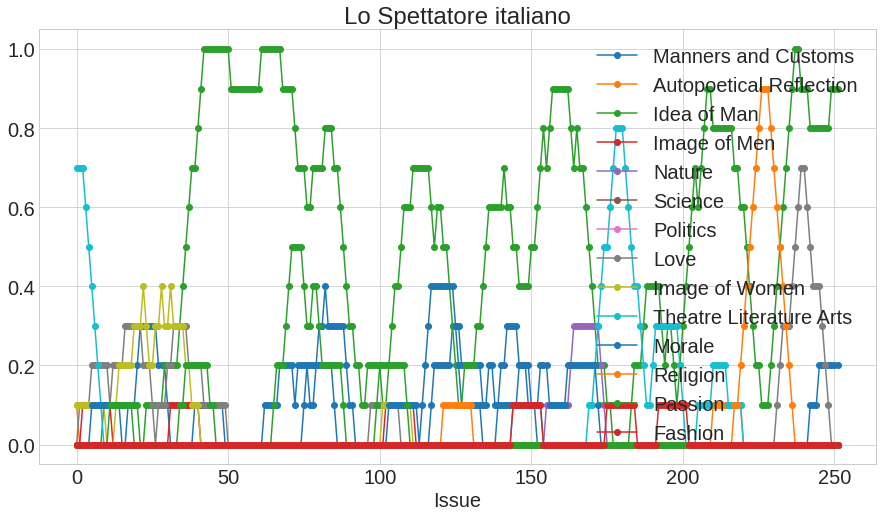

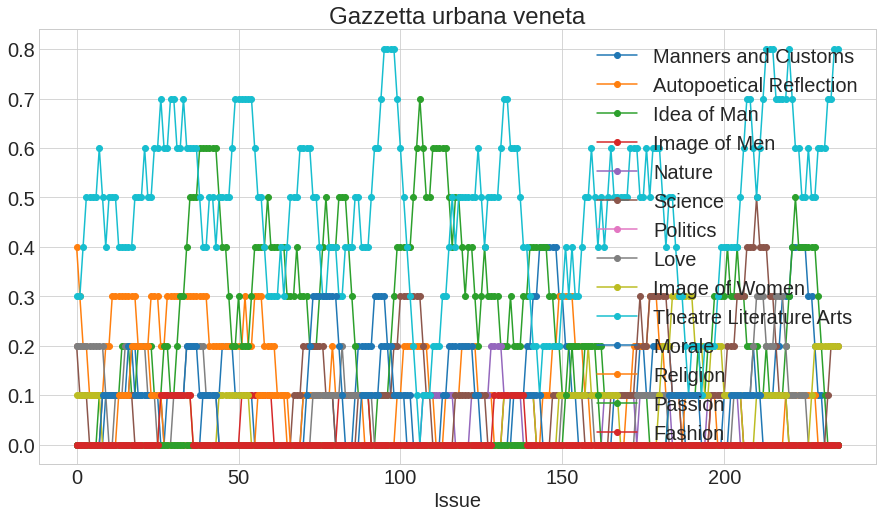

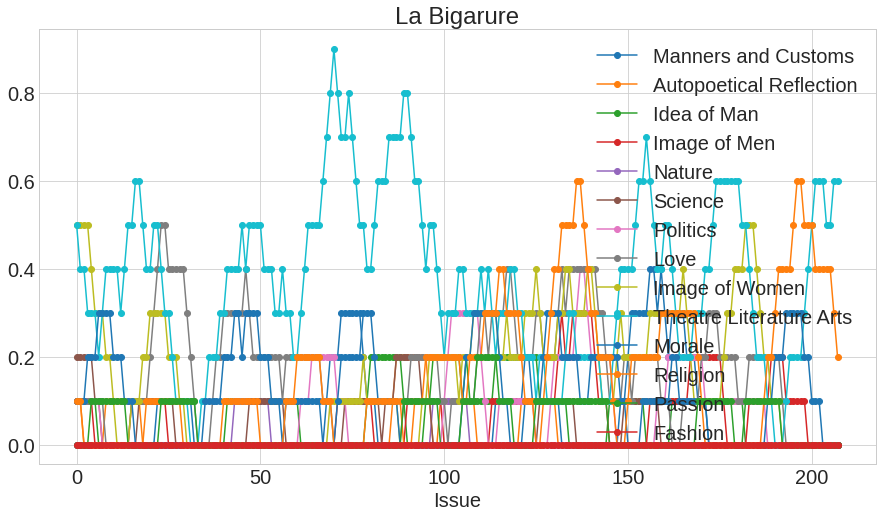

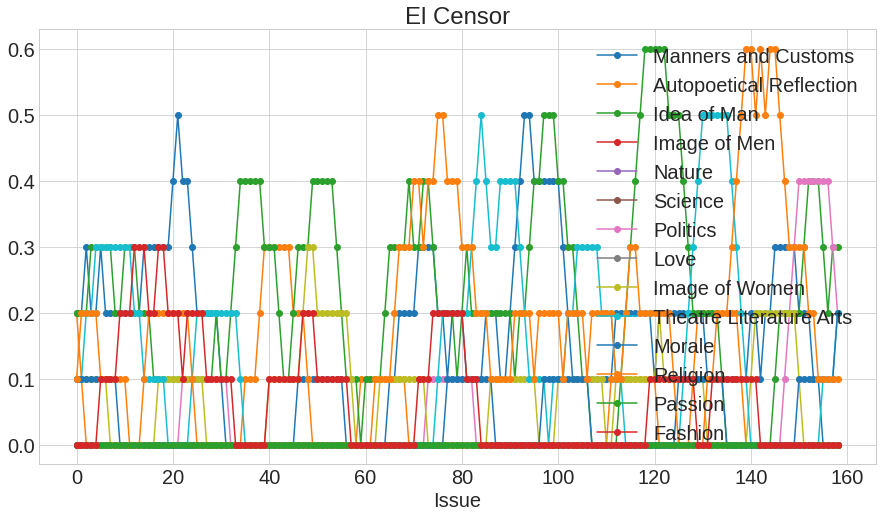

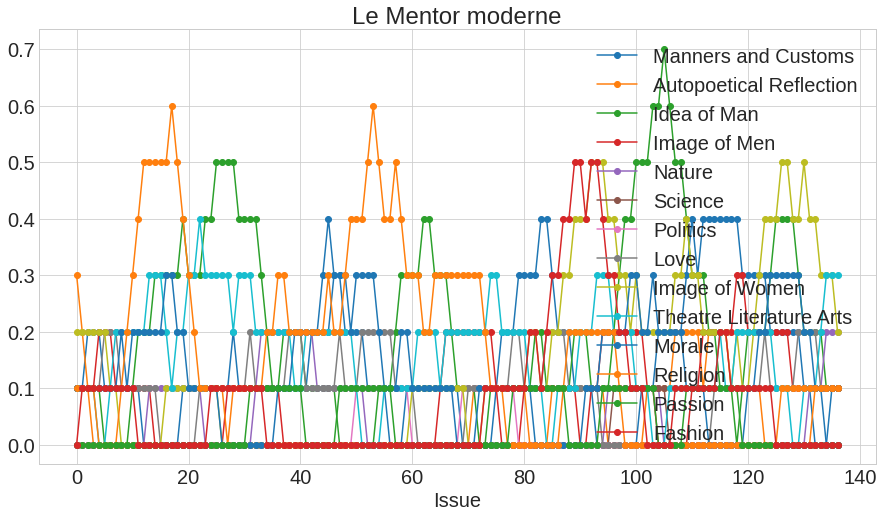

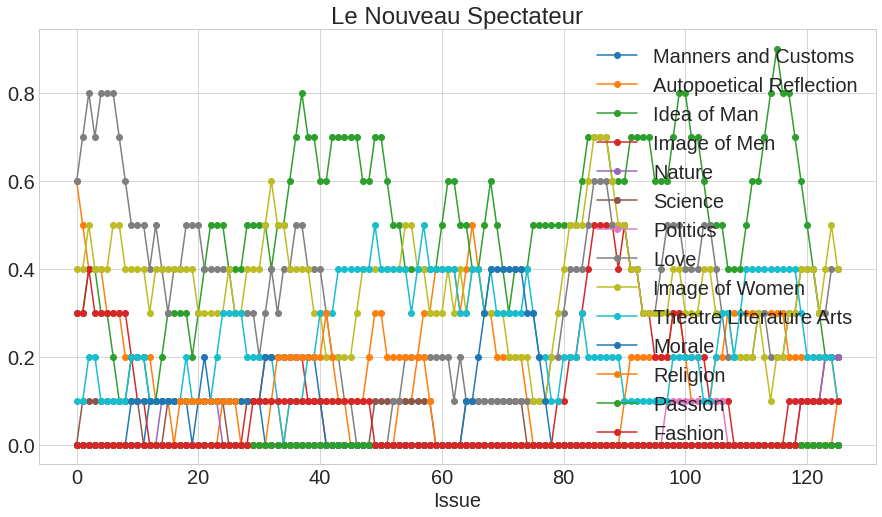

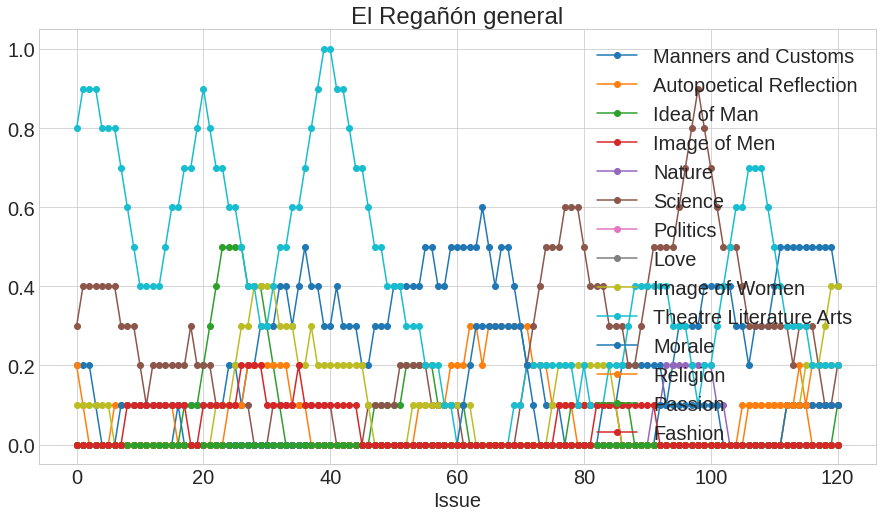

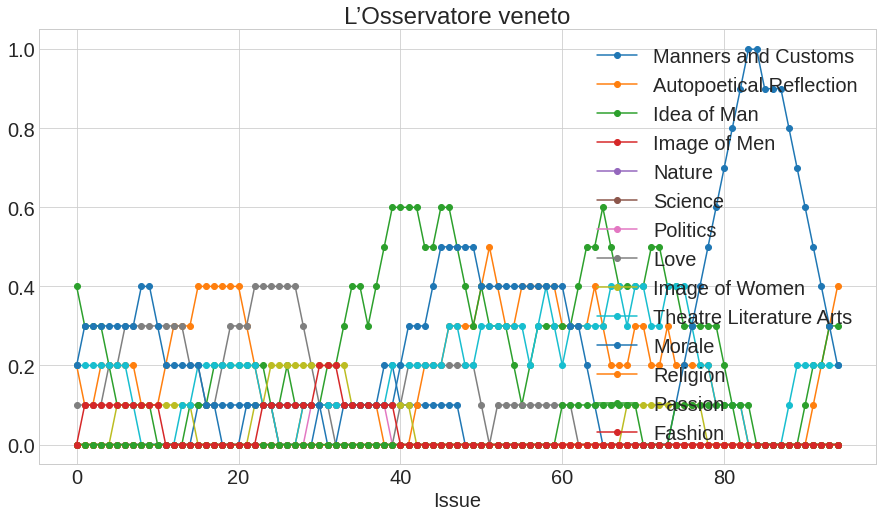

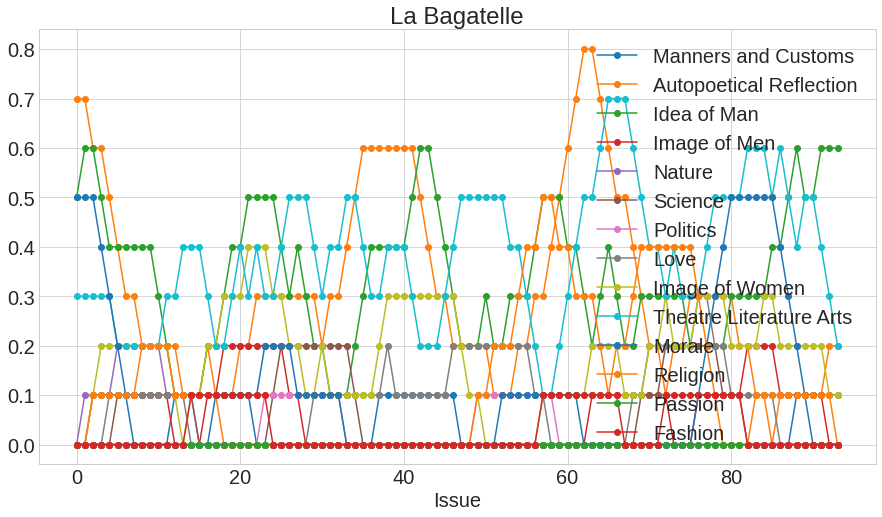

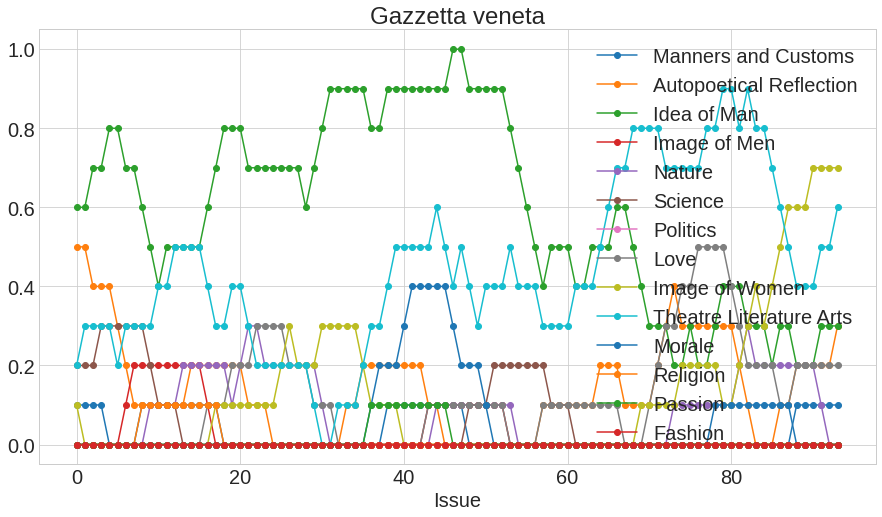

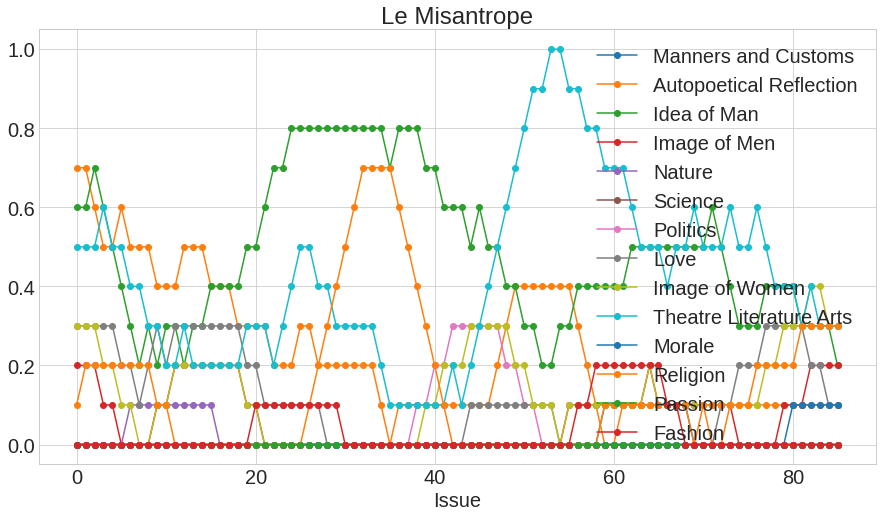

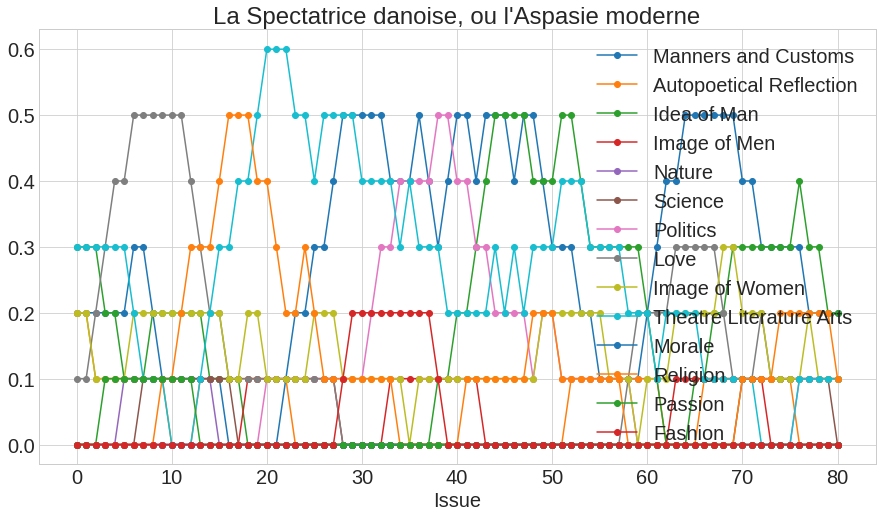

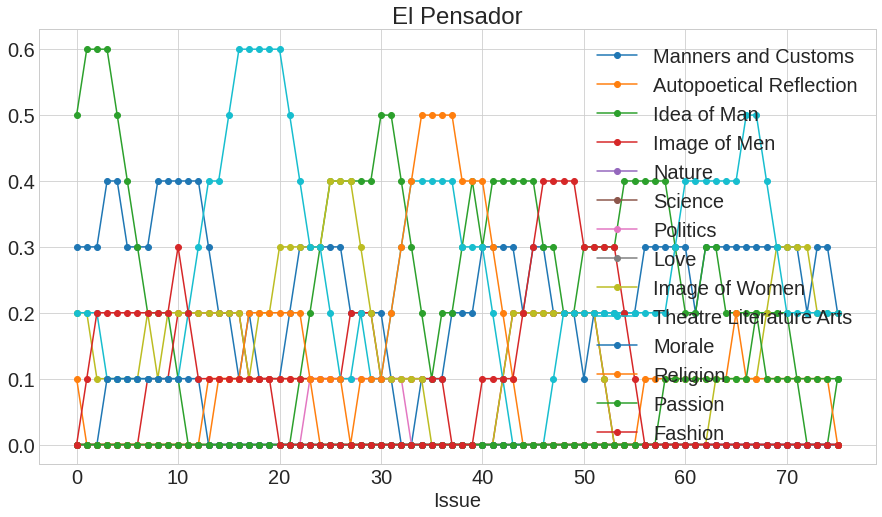

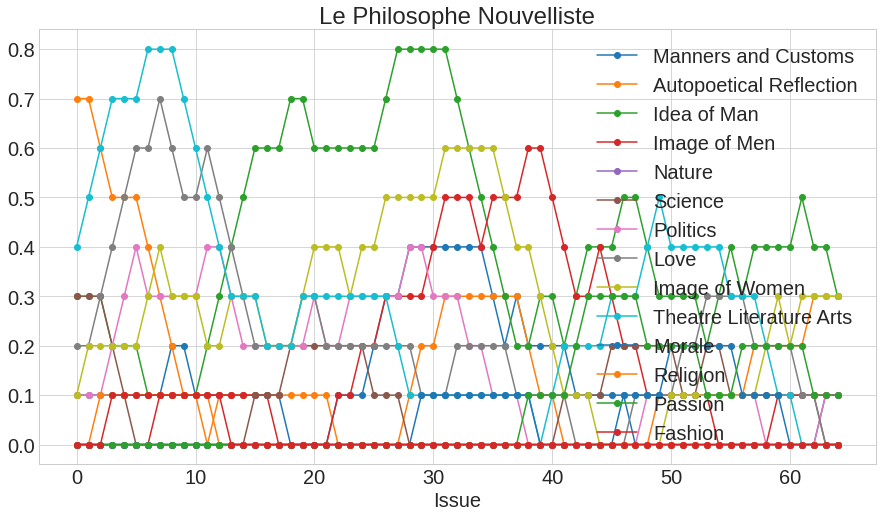

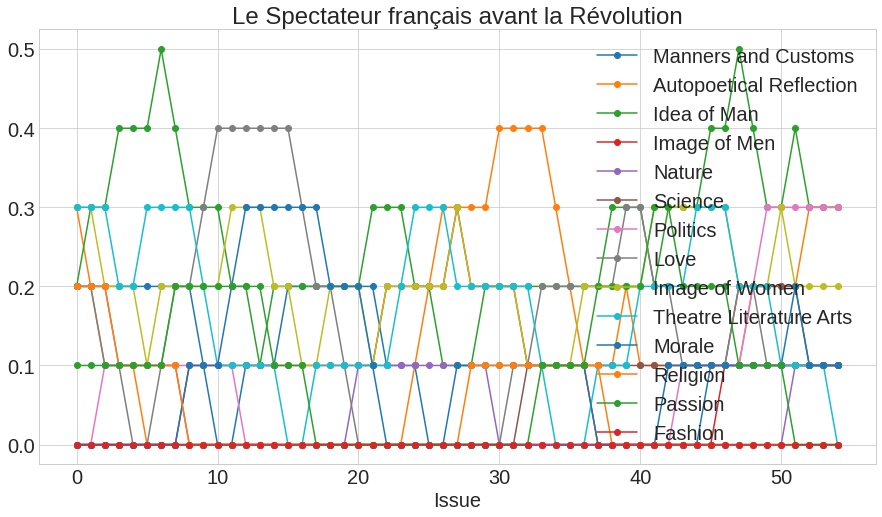

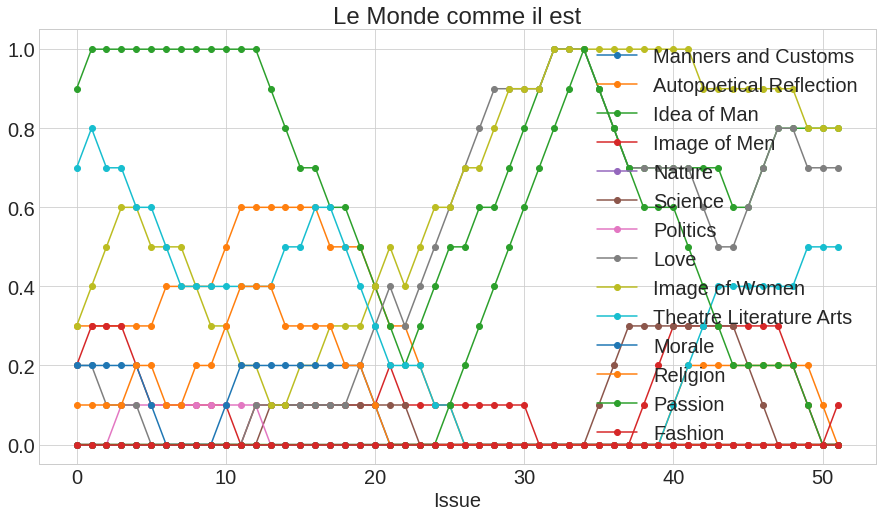

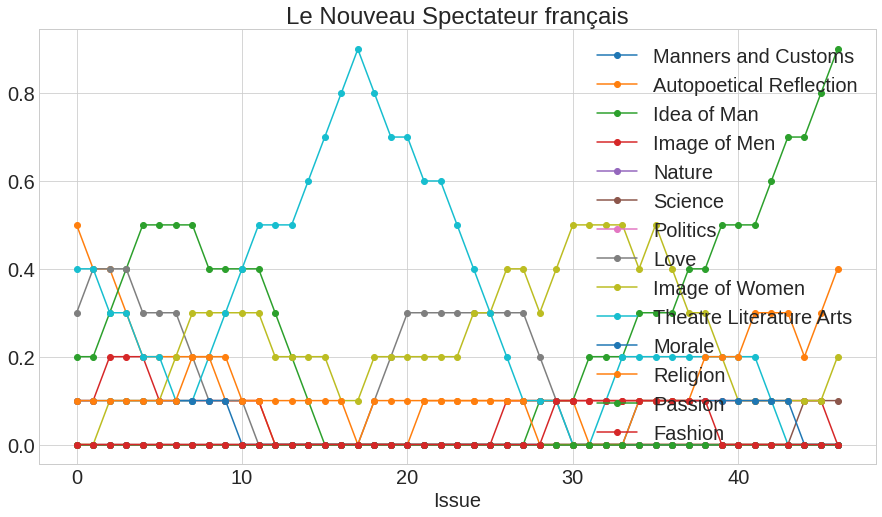

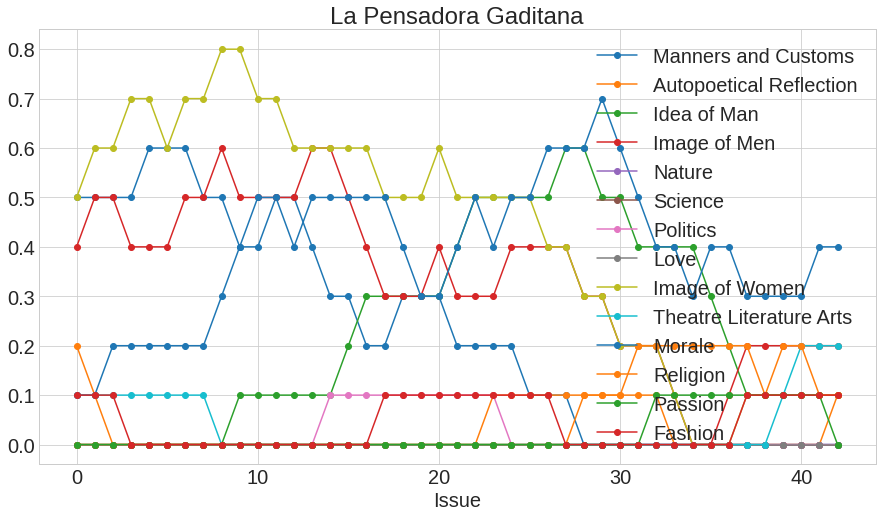

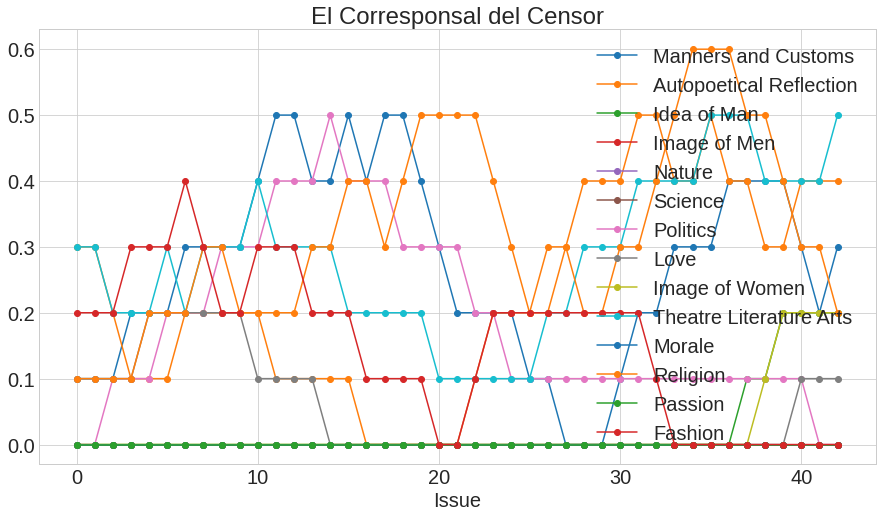

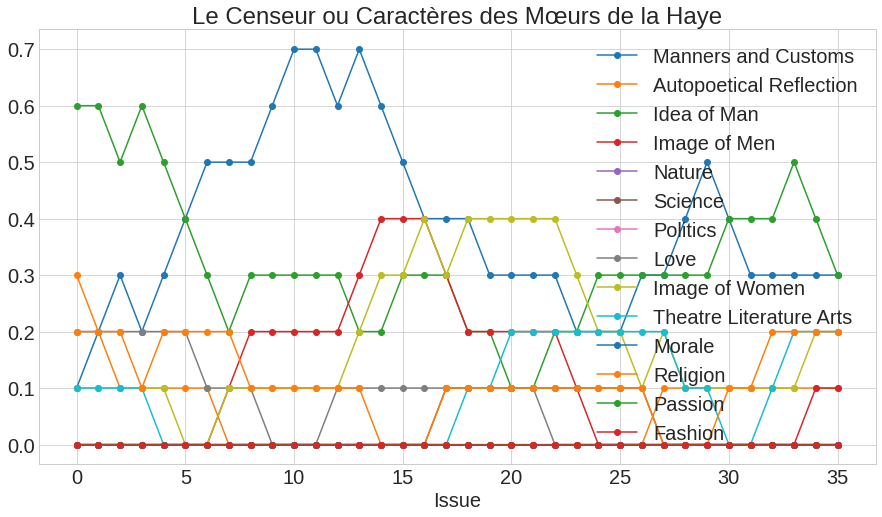

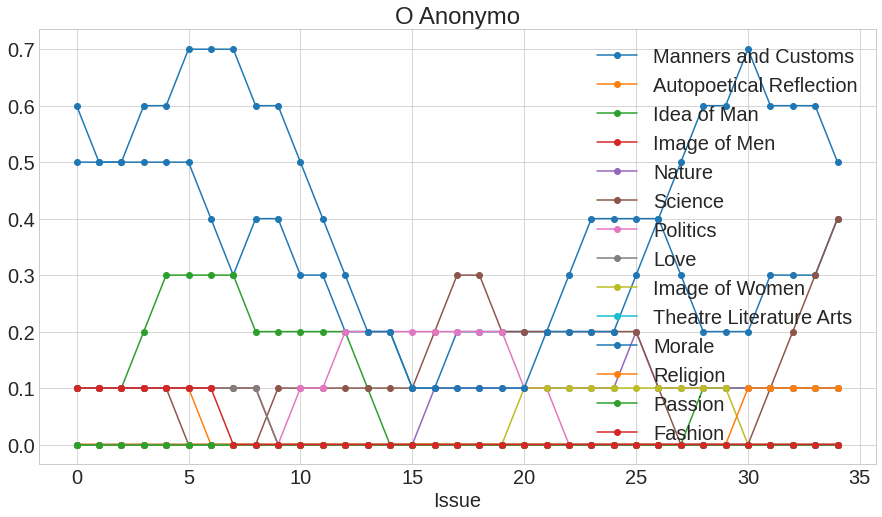

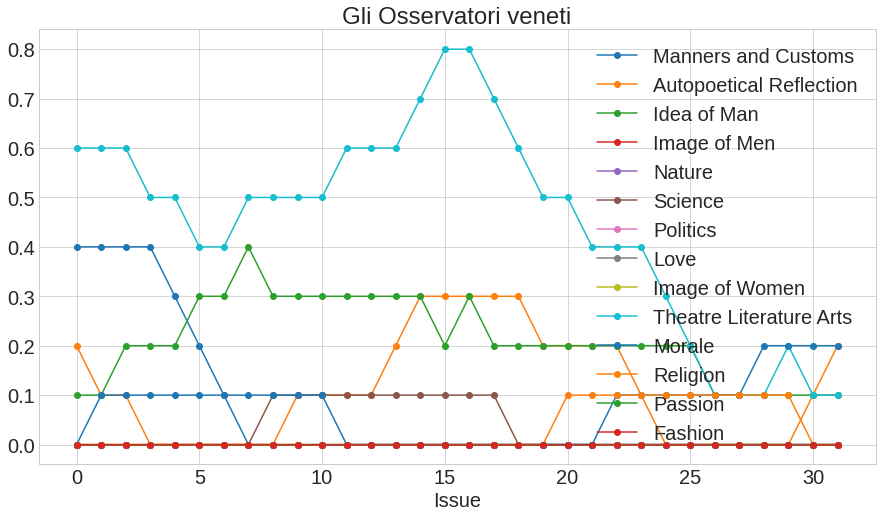

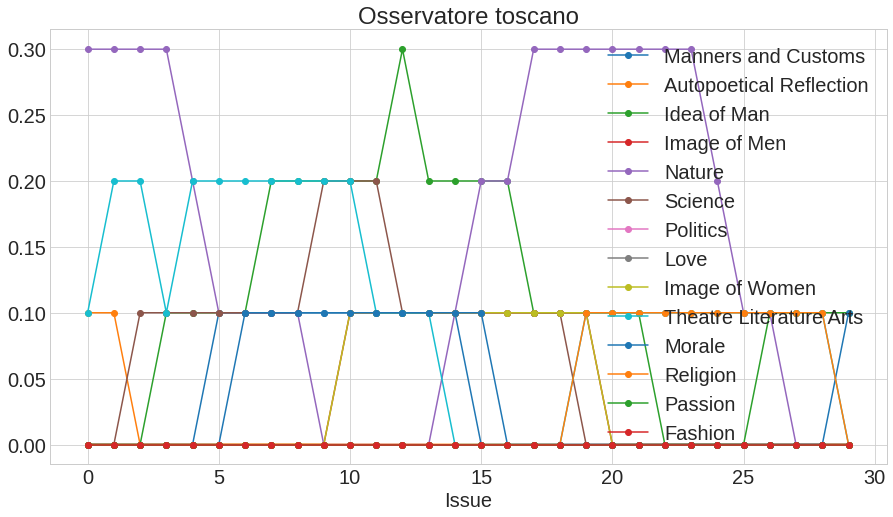

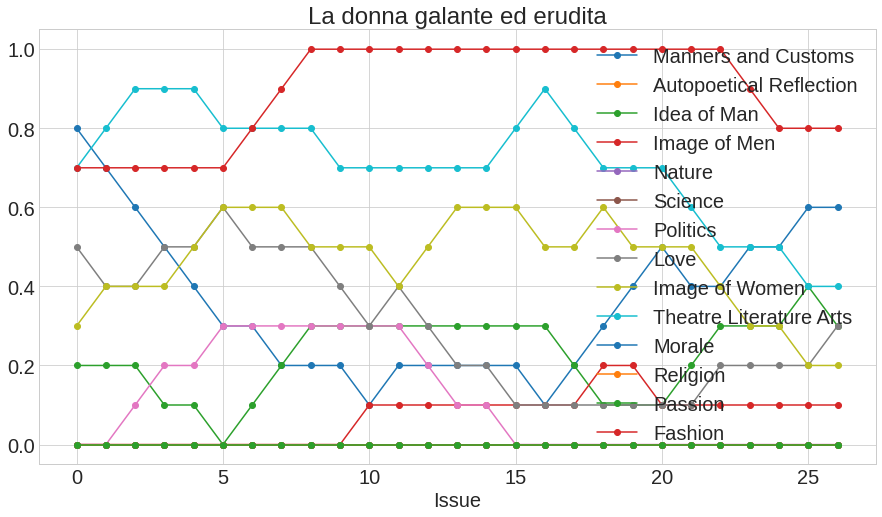

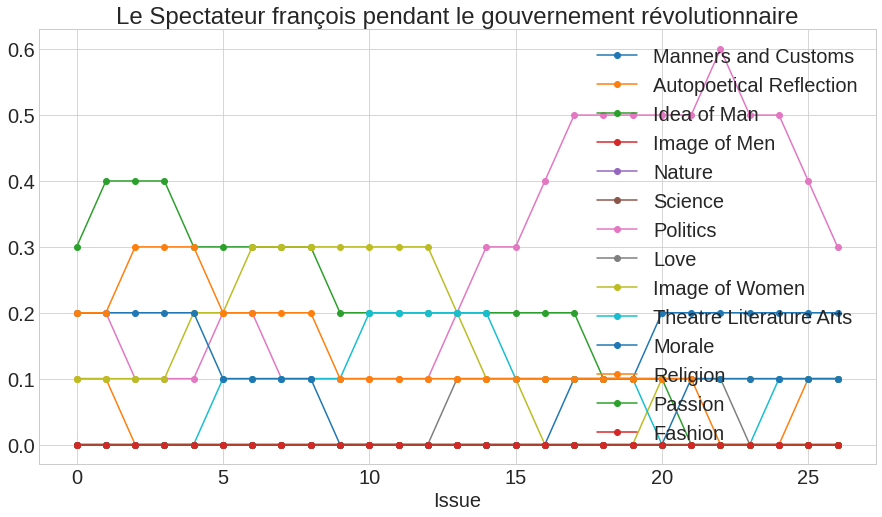

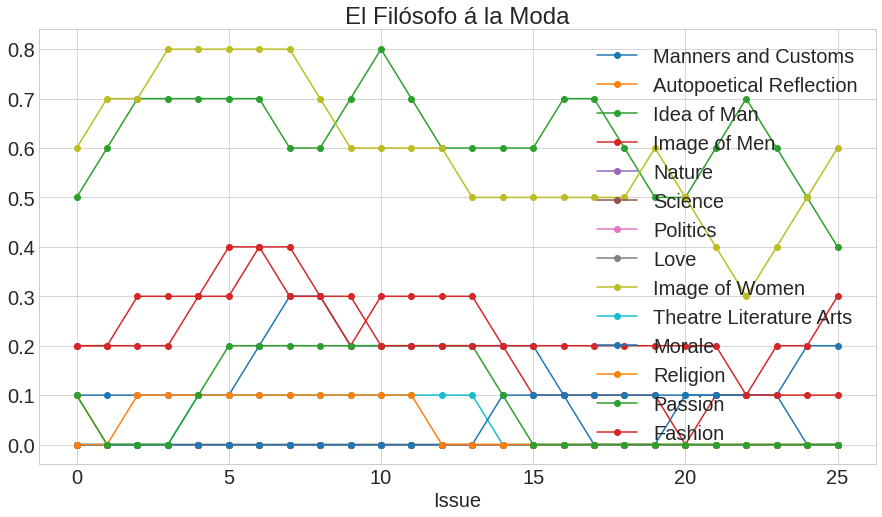

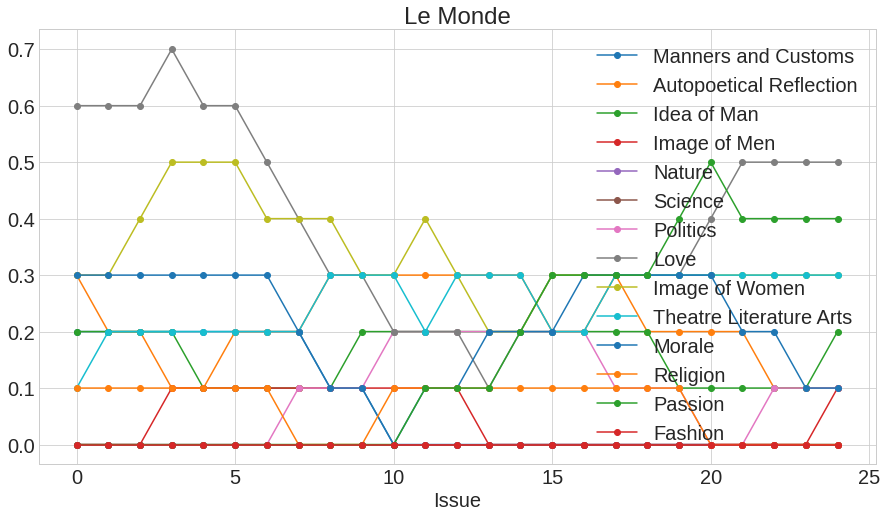

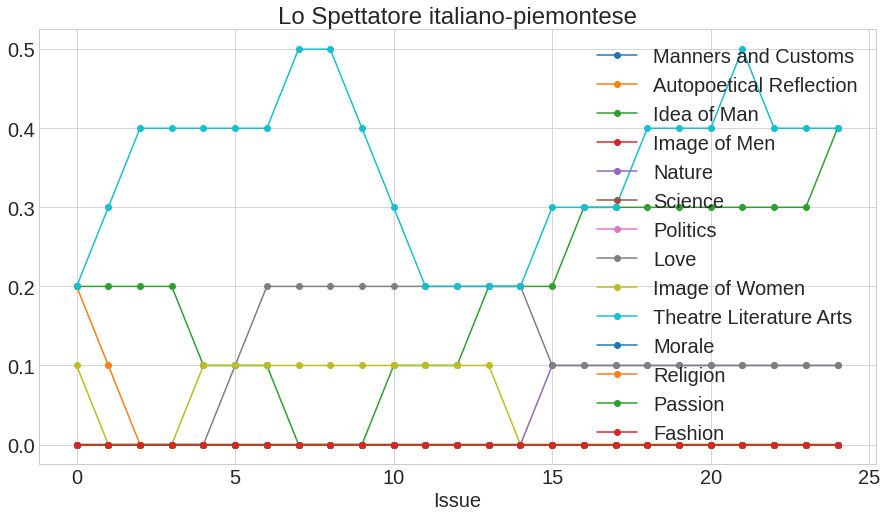

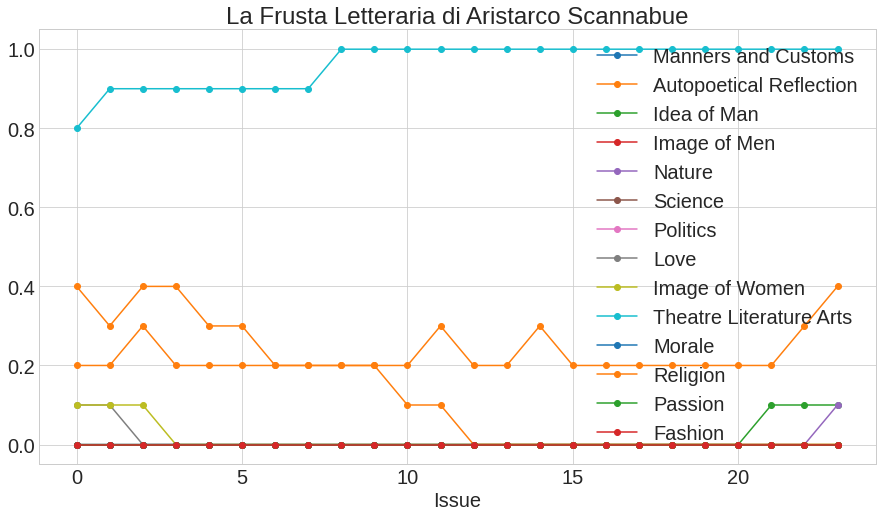

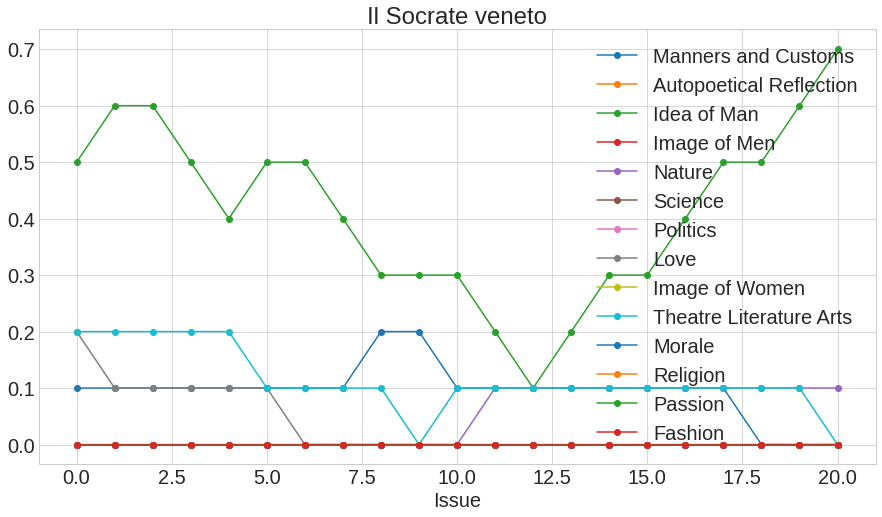

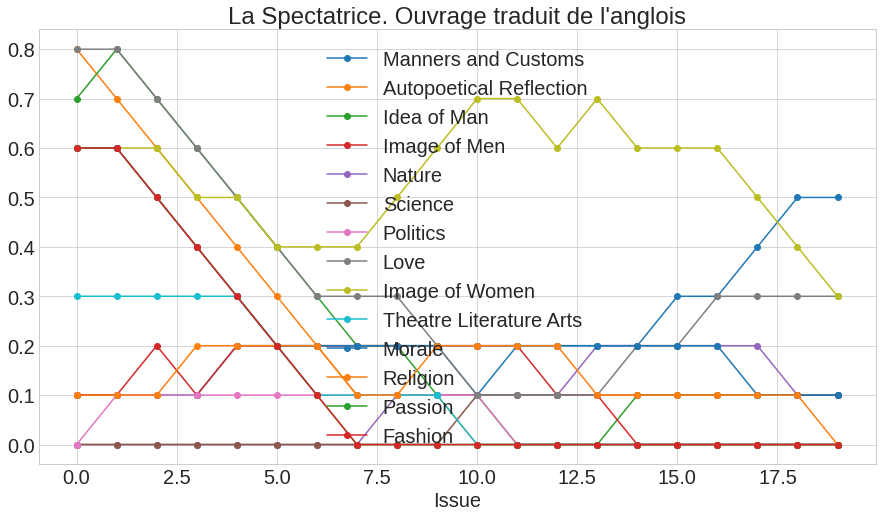

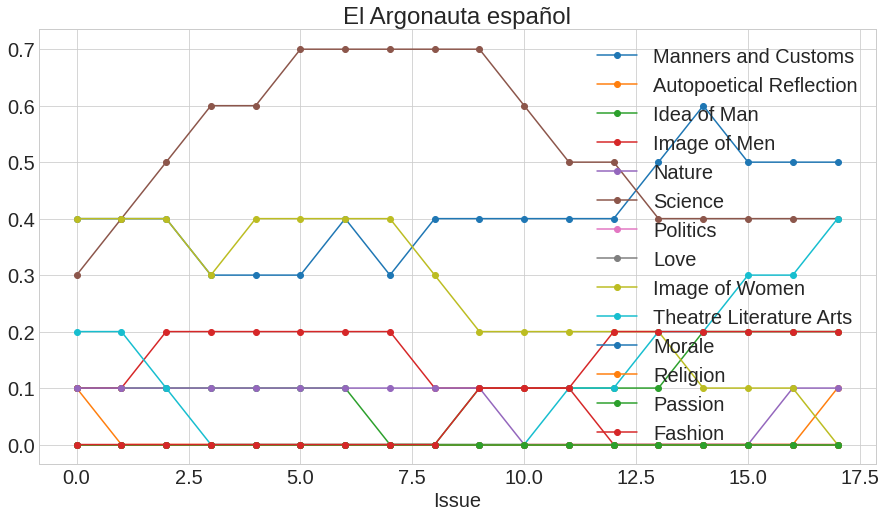

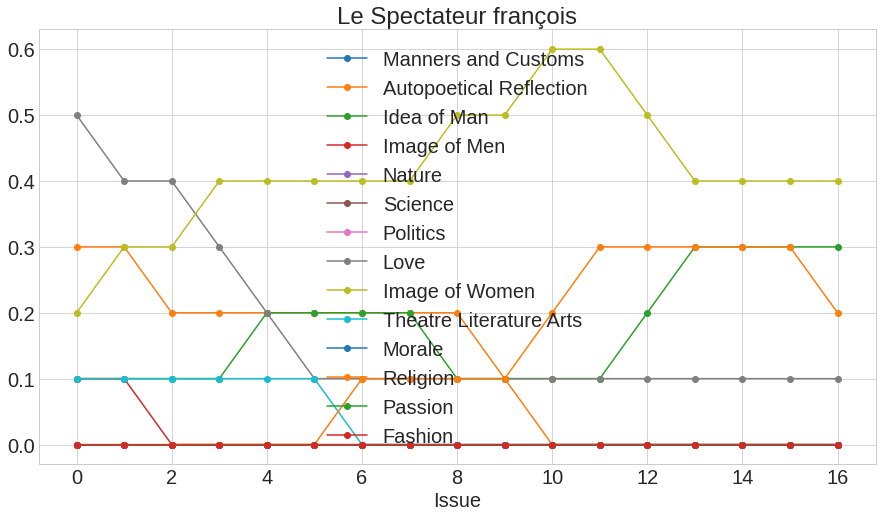

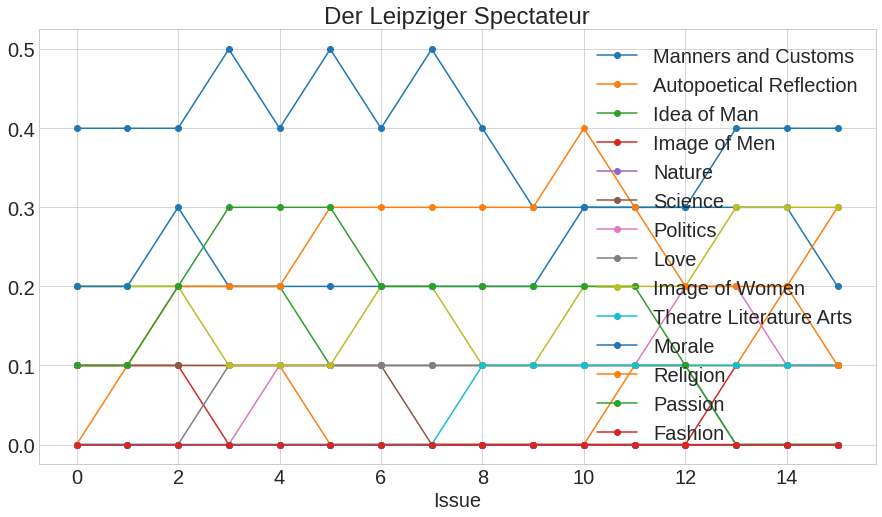

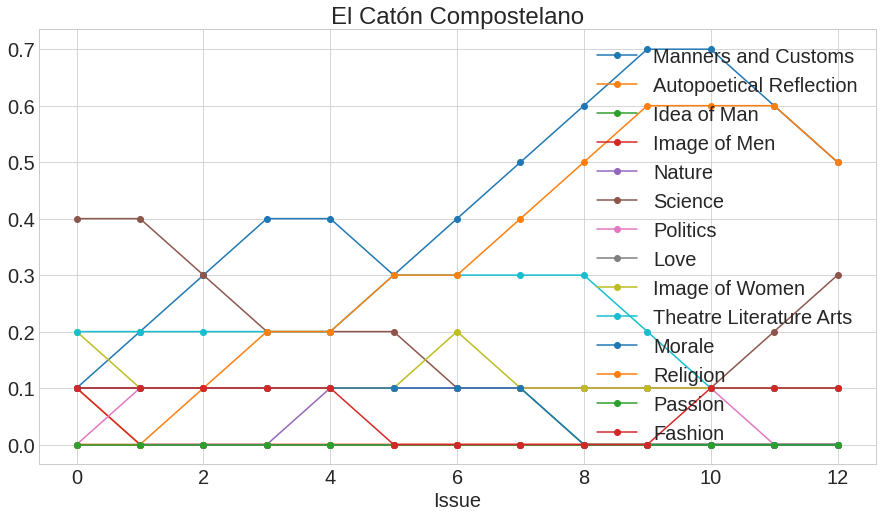

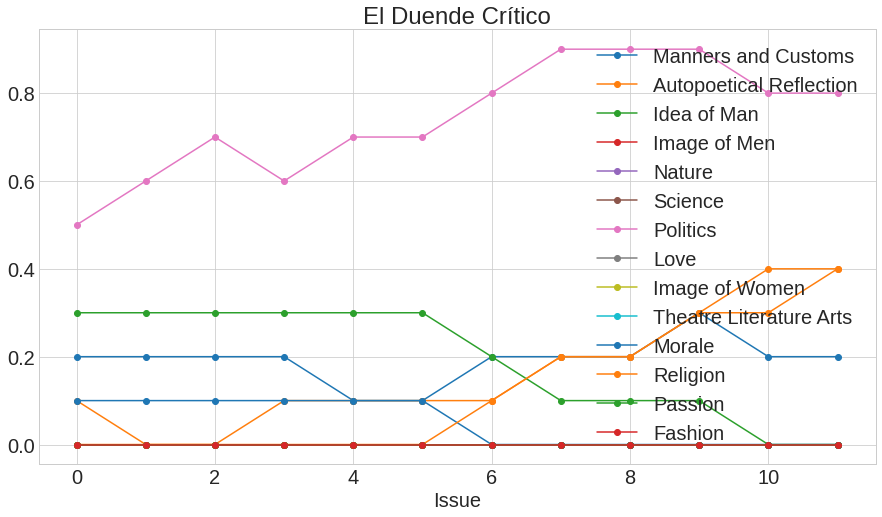

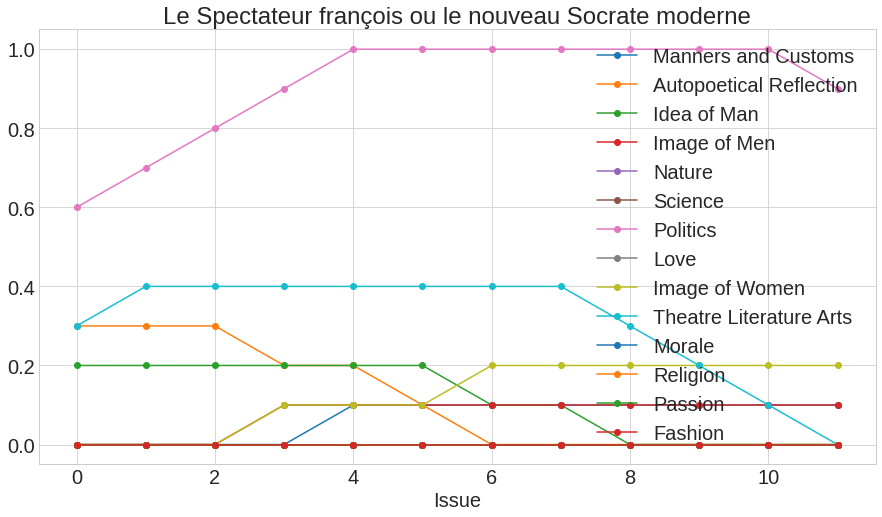

In [24]:
from numpy.lib.stride_tricks import as_strided as stride
def roll(df, w, **kwargs):
    v = df.values
    d0, d1 = v.shape
    s0, s1 = v.strides

    a = stride(v, (d0 - (w - 1), w, d1), (s0, s0, s1))

    rolled_df = pd.concat({
        row: pd.DataFrame(values, columns=df.columns)
        for row, values in zip(df.index, a)
    })

    return rolled_df.groupby(level=0, **kwargs)

window_size=10

for ind in range(len(journal_count)):
    if journal_count.values[ind]>20:
        journal=journal_count.index[ind]

        topics_year_language=texts_changes.loc[texts_changes.periodical_title==journal].drop('date',axis=1)

        ax = roll(topics_year_language.sort_values(by=['volume_number','issue_number']).reset_index()[relevant_topics], window_size).mean() \
            .plot(figsize=(15,8),marker='o',title=journal)
        ax.set_xlabel('Issue')
        fig = ax.get_figure()
        fig.savefig("results/plots/topics/topics_time_"+journal+".pdf",bbox_inches='tight')

In [25]:
topics_language=texts_changes.groupby('periodical_title').sum()
topics_language=topics_language[(topics_language.T != 0).any()]
topics_language=topics_language.div(topics_language.sum(axis=1), axis=0)
topics_language

Manners and Customs  \
periodical_title                                            
Der Bürger                                       0.000000   
Der Leipziger Spectateur                         0.195122   
Der Zuschauer                                    0.500000   
Die Zuschauerin                                  0.000000   
El Amigo y Corresponsal del Pensador             0.166667   
...                                                   ...   
Lo Spettatore italiano-piemontese                0.000000   
L’Osservatore veneto                             0.024000   
O Anonymo                                        0.298246   
Osservatore toscano                              0.043478   
The Female Spectator                             0.000000   

                                      Autopoetical Reflection  Idea of Man  \
periodical_title                                                             
Der Bürger                                           0.500000     0.000000   
Der Leipziger Spectateur                             0.097561     0.073171   
Der Zuschauer                                        0.000000     0.000000   
Die Zuschauerin                                      0.166667     0.111111   
El Amigo y Corresponsal del Pensador                 0.000000     0.000000   
...                                                       ...          ...   
Lo Spettatore italiano-piemontese                    0.076923     0.307692   
L’Osservatore veneto                                 0.184000     0.232000   
O Anonymo                                            0.017544     0.070175   
Osservatore toscano                                  0.043478     0.173913   
The Female Spectator                                 0.125000     0.125000   

                                      Image of Men    Nature   Science  \
periodical_title                                                         
Der Bürger                                0.000000  0.000000  0.000000   
Der Leipziger Spectateur                  0.048780  0.000000  0.024390   
Der Zuschauer                             0.000000  0.000000  0.500000   
Die Zuschauerin                           0.111111  0.000000  0.000000   
El Amigo y Corresponsal del Pensador      0.166667  0.000000  0.000000   
...                                            ...       ...       ...   
Lo Spettatore italiano-piemontese         0.000000  0.038462  0.000000   
L’Osservatore veneto                      0.000000  0.000000  0.000000   
O Anonymo                                 0.017544  0.035088  0.140351   
Osservatore toscano                       0.043478  0.260870  0.086957   
The Female Spectator                      0.125000  0.000000  0.000000   

                                      Politics      Love  Image of Women  \
periodical_title                                                           
Der Bürger                            0.000000  0.000000        0.000000   
Der Leipziger Spectateur              0.048780  0.024390        0.121951   
Der Zuschauer                         0.000000  0.000000        0.000000   
Die Zuschauerin                       0.000000  0.111111        0.166667   
El Amigo y Corresponsal del Pensador  0.000000  0.000000        0.000000   
...                                        ...       ...             ...   
Lo Spettatore italiano-piemontese     0.000000  0.115385        0.076923   
L’Osservatore veneto                  0.008000  0.088000        0.040000   
O Anonymo                             0.035088  0.017544        0.017544   
Osservatore toscano                   0.000000  0.000000        0.043478   
The Female Spectator                  0.000000  0.125000        0.125000   

                                      Theatre Literature Arts    Morale  \
periodical_title                                                          
Der Bürger                                           0.000000  0.500000   
Der Leipziger Spectateur                            

In [26]:
language_journal=texts_changes.pivot_table(values='date', index='periodical_title',columns='language',aggfunc='count')
language_journal[language_journal > 0] = 1
language_journal = language_journal.fillna(0)
language_journal

language                              English  French  German  Italian  \
periodical_title                                                         
Der Bürger                                0.0     0.0     1.0      0.0   
Der Leipziger Spectateur                  0.0     0.0     1.0      0.0   
Der Zuschauer                             0.0     0.0     1.0      0.0   
Die Zuschauerin                           0.0     0.0     1.0      0.0   
El Amigo y Corresponsal del Pensador      0.0     0.0     0.0      0.0   
...                                       ...     ...     ...      ...   
Lo Spettatore italiano-piemontese         0.0     0.0     0.0      1.0   
L’Osservatore veneto                      0.0     0.0     0.0      1.0   
O Anonymo                                 0.0     0.0     0.0      0.0   
Osservatore toscano                       0.0     0.0     0.0      1.0   
The Female Spectator                      1.0     0.0     0.0      0.0   

language                              Portuguese  Spanish; Castilian  
periodical_title                                                      
Der Bürger                                   0.0                 0.0  
Der Leipziger Spectateur                     0.0                 0.0  
Der Zuschauer                                0.0                 0.0  
Die Zuschauerin                              0.0                 0.0  
El Amigo y Corresponsal del Pensador         0.0                 1.0  
...                                          ...                 ...  
Lo Spettatore italiano-piemontese            0.0                 0.0  
L’Osservatore veneto                         0.0                 0.0  
O Anonymo                                    1.0                 0.0  
Osservatore toscano                          0.0                 0.0  
The Female Spectator                         0.0                 0.0  

[67 rows x 6 columns]

In [27]:
# In this cell we compute the information bottleneck clustering of
# all periodicals w.r.t. their topics. If this cell is executed multiple
# times, only the best result is kept.

Number_of_Clusters=3

from IB import *
ds = dataset(pxy=topics_language.values/np.sum(topics_language.values))
ds.clamped=True
m=model(ds=ds,alpha=0,beta=25,Tmax=Number_of_Clusters)
m.fit(keep_steps=True)

import os.path
fname='results_' + str(m.Tmax) + '.obj'
if not os.path.isfile(fname):
    file_result = open(fname, 'wb')
    pickle.dump(m, file_result)
    print('Stored first solution')
file_result = open(fname, 'rb')
old_m=pickle.load(file_result)
if (old_m.Tmax == m.Tmax) and (m.iyt>old_m.iyt):
    file_result = open(fname, 'wb')
    pickle.dump(m, file_result)
    print('Better solution found')

step 1: I(X,T) = 1.585, H(T) = 1.585, T = 3, H(X) = 6.066, I(Y,T) = 0.075, I(X,Y) = 1.032, L = -0.297
******************** Beginning IB fit with the following parameters ********************
alpha = 0.00, beta = 25.0, Tmax = 3, p0 = None, wav = None, geo = False,
ctol_abs = 1e-04, ctol_rel = 0e+00, cthresh = 1, ptol = 1e-08, zeroLtol = 0e+00
smoothing_type = None, smoothing_center = None, s = None, d = None
****************************************************************************************
step 2: I(X,T) = 1.565, H(T) = 1.565, T = 3, H(X) = 6.066, I(Y,T) = 0.247, I(X,Y) = 1.032, L = -4.607
step 3: I(X,T) = 1.556, H(T) = 1.556, T = 3, H(X) = 6.066, I(Y,T) = 0.258, I(X,Y) = 1.032, L = -4.901
step 4: I(X,T) = 1.556, H(T) = 1.556, T = 3, H(X) = 6.066, I(Y,T) = 0.258, I(X,Y) = 1.032, L = -4.901
converged due to small absolute changes in objective
single-cluster mapping not better; changes L from -4.9007 to 0.0000 (zeroLtol = 0.0e+00).
no merges reduce L
converged in 4 step(s) to: I(X,T

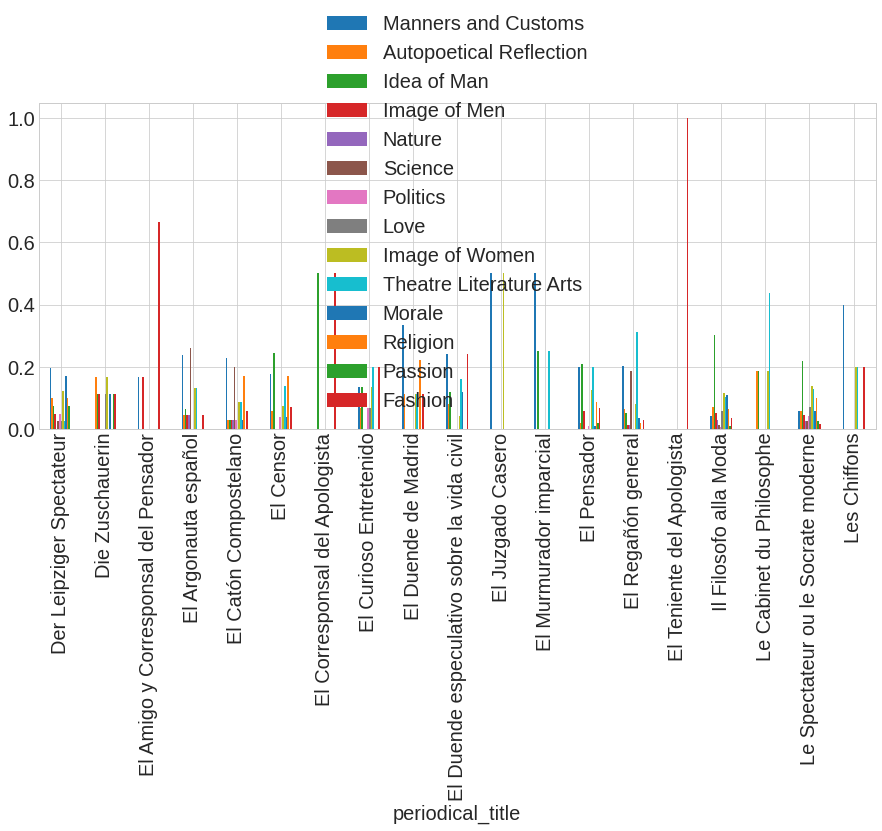

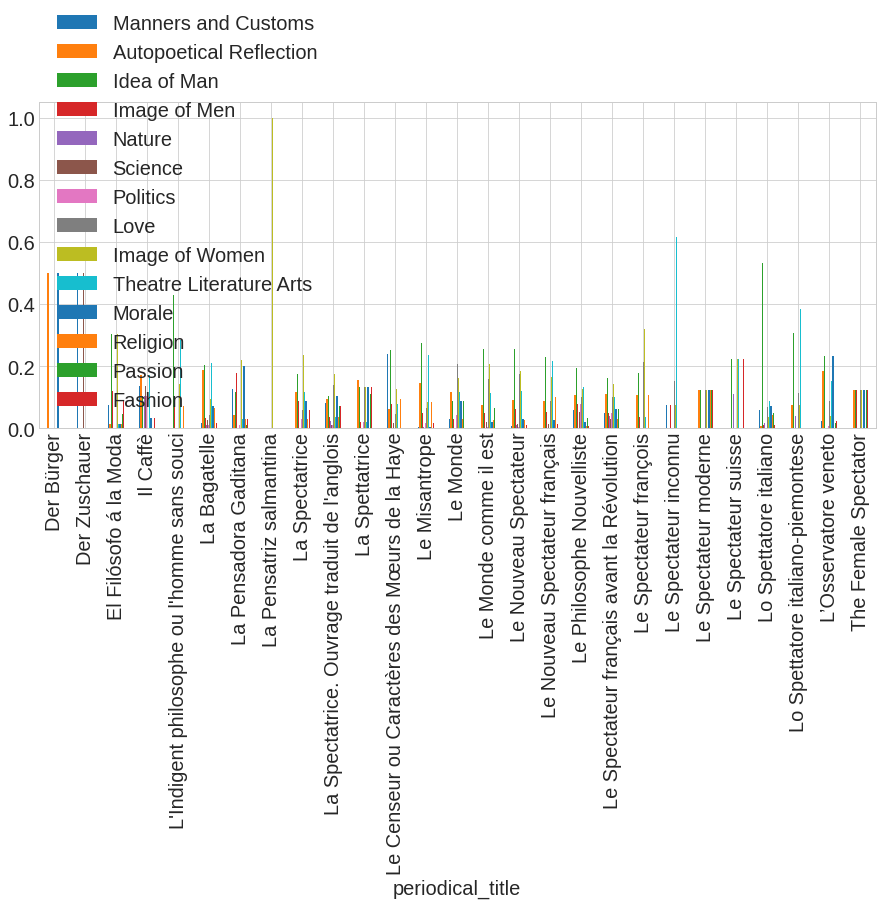

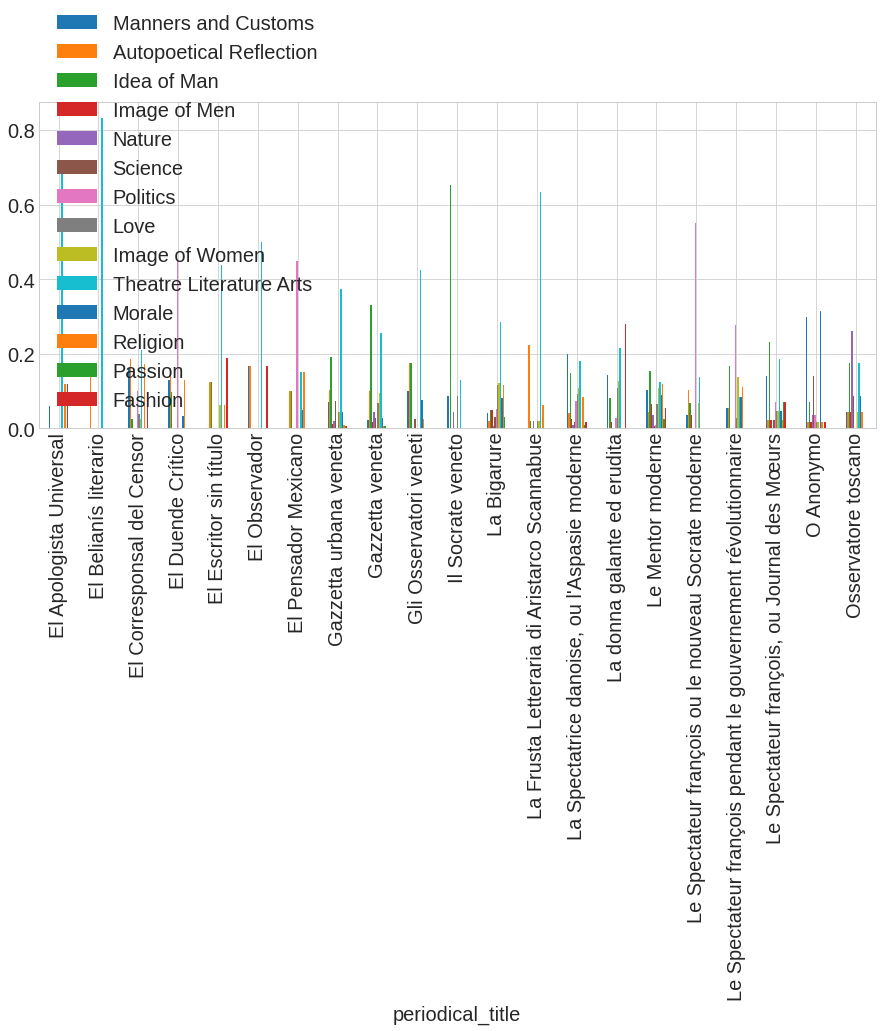

In [28]:
file_result = open('results_' + str(Number_of_Clusters) + '.obj', 'rb')
best_m=pickle.load(file_result)

for Cluster in range(Number_of_Clusters):
    ax=topics_language.loc[best_m.qt_x[Cluster]==1,:].plot(figsize=(15,6),kind='bar')
    fig = ax.get_figure()
    fig.savefig("results/plots/topics/main_topics_"+str(Number_of_Clusters)+"_clusters_"+str(Cluster)+".pdf",bbox_inches='tight')

<ipython-input-29-f1c5099bb6d0>:17: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  f.show()
<ipython-input-29-f1c5099bb6d0>:5: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  wedges, texts, autotexts = axs[Cluster][0].pie(topics_language.loc[best_m.qt_x[Cluster]==1,:].mean(), autopct='%1.f%%', \


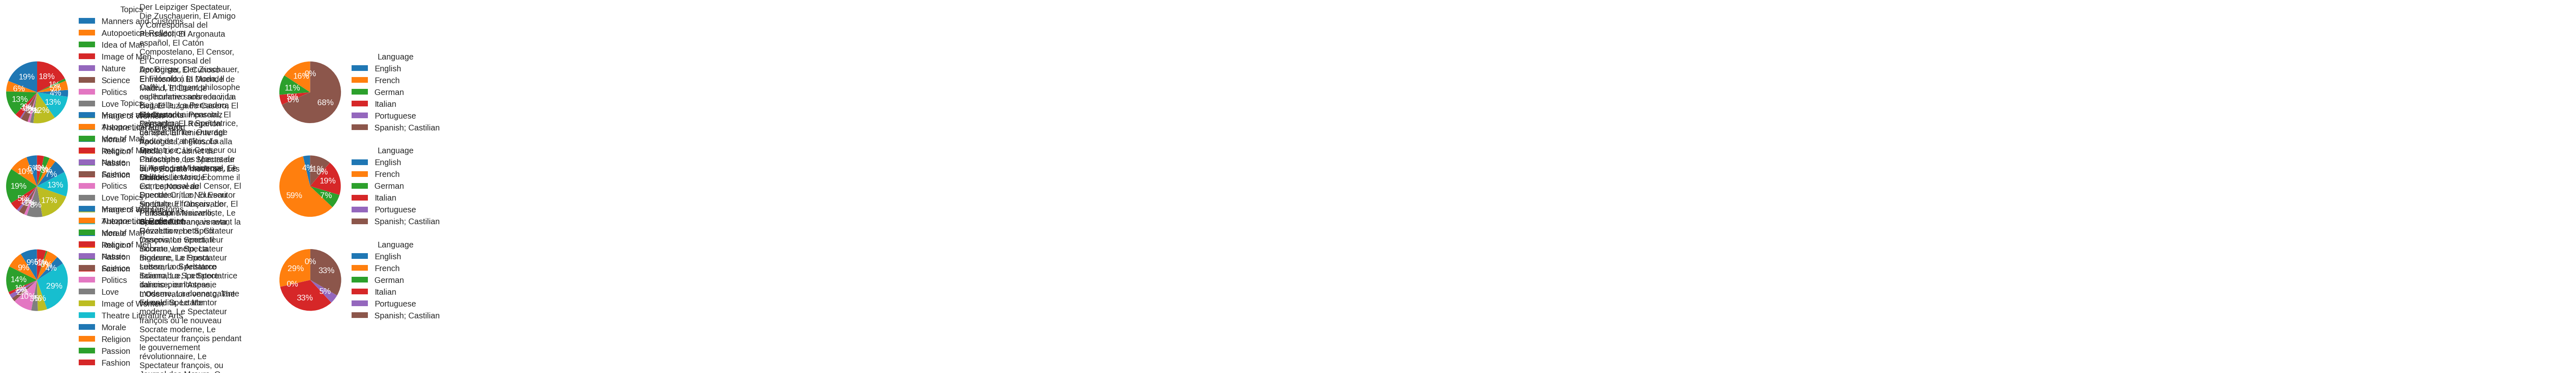

In [29]:
import matplotlib.pyplot as plt
f, axs = plt.subplots(Number_of_Clusters, 3, figsize=(15,4*Number_of_Clusters))
f.subplots_adjust(wspace = 1) 
for Cluster in range(Number_of_Clusters):
    wedges, texts, autotexts = axs[Cluster][0].pie(topics_language.loc[best_m.qt_x[Cluster]==1,:].mean(), autopct='%1.f%%', \
            startangle=90,textprops=dict(color="w"))
    axs[Cluster][0].legend(wedges, topics_language.columns,title="Topics",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
    axs[Cluster][0].axis('equal')
    axs[Cluster][1].axis([0, 1, 0, 1])
    axs[Cluster][1].axis('off')
    txt=axs[Cluster][1].text(0, 0.5, ', '.join(topics_language.index[best_m.qt_x[Cluster]==1].values), ha='left',va='center', wrap=True)
    txt._get_wrap_line_width = lambda : 250.
    wedges, texts, autotexts = axs[Cluster][2].pie(language_journal.loc[best_m.qt_x[Cluster]==1,:].sum(), autopct='%1.f%%', \
            startangle=90,textprops=dict(color="w"))
    axs[Cluster][2].legend(wedges, language_journal.columns,title="Language",loc="center left",bbox_to_anchor=(1, 0, 0.5, 1))
    axs[Cluster][2].axis('equal')
    f.show()
    f.savefig("results/plots/topics/main_topics_summary_"+str(Number_of_Clusters)+"_Clusters.pdf",bbox_inches='tight')